# Analysing Western States - Preparation & Participation

The Western States Endurance Run takes place
in the Sierra Nevada mountains in California every June. It is also 170km long and provides an
extremely tough challenge largely due to high temperatures. The data sets for the 2007 to 2017
renewals of this race where downloaded from www.wser.org, and contained much the same runner
information as the UTMB data sets, including individual stage pacing.

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import hashlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)

In this notebook, I load, pre-process and combine the Western States results dataset. 

## Read 2018

The most recent year in the dataset was 2018. I first check if the path to the csv file that contains the 2018 data exists, and when that works I read in the csv file to a dataframe. I check the head and shape of the dataframe to check that all the data has been read properly. 

In [3]:
if not os.path.exists( "../../raw/wser2018.csv" ):
    print("Missing dataset file")

In [4]:
df18 = pd.read_csv( "../../raw/wser2018.csv")

In [5]:
df18.head()

,Overall Place,Time,Bib,First Name,Last Name,Gender,Age,City,State,Country,Start,Pos,Lyon Ridge,Pos.1,Red Star Ridge,Pos.2,Duncan Canyon,Pos.3,Robinson Flat,Pos.4,Miller's Defeat,Pos.5,Dusty Corners,Pos.6,Last Chance,Pos.7,Devil's Thumb,Pos.8,El Dorado Creek,Pos.9,Michigan Bluff,Pos.10,Foresthill,Pos.11,Dardanelles (Cal-1),Pos.12,Peachstone (Cal-2),Pos.13,Ford's Bar (Cal-3),Pos.14,Rucky Chucky,Pos.15,Green Gate,Pos.16,Auburn Lake Trails,Pos.17,Quarry Road,Pos.18,Pointed Rocks,Pos.19,No Hands Bridge,Pos.20,Robie Point,Pos.21,Finish,Pos.22
0,1,14:30:04,20,Jim,Walmsley,M,28,Flagstaff,AZ,USA,--:--,--,01:44:00,9,02:32:00,1.0,03:32:00,1.0,04:28:00,1.0,04:58:00,1.0,05:23:00,1.0,06:03:00,1.0,06:52:00,1.0,07:35:00,1.0,08:06:00-08:11:00,1.0,08:59:00-08:59:30,1.0,09:27:00,1.0,10:05:00,1.0,10:28:00,1.0,11:05:00,1.0,11:25:00,1.0,12:16:00,1.0,13:03:00,1.0,13:42:02,1.0,--:--,NaN,14:19:43,6.0,14:30:04,1.0
1,2,15:54:53,13,Francois,Dhaene,M,32,Saint Julien,FRA,FRA,--:--,--,01:43:00,4,02:35:00,3.0,03:41:00,3.0,04:39:00,2.0,05:10:00,2.0,05:37:00,2.0,06:17:00,2.0,07:07:00,2.0,07:47:00,2.0,08:25:00-08:30:00,2.0,09:27:00-09:27:30,2.0,10:02:00,2.0,10:46:00,2.0,11:10:00,2.0,11:52:00,2.0,12:17:00,2.0,13:12:00,2.0,14:04:00,2.0,14:50:00-14:52:00,2.0,--:--,NaN,15:40:27,7.0,15:54:53,2.0
2,3,16:08:59,M3,Mark,Hammond,M,33,Millcreek,UT,USA,--:--,--,01:45:00,15,02:39:00,8.0,03:47:00,9.0,04:50:00,6.0,05:26:00,8.0,--:--,NaN,06:34:00,6.0,07:27:00,5.0,08:08:00,4.0,08:47:00-08:50:00,3.0,09:45:00-09:47:00,3.0,10:17:00,3.0,11:03:00,3.0,11:29:00,3.0,12:09:00,3.0,12:35:00,3.0,13:29:00,3.0,14:21:00,3.0,15:05:00-15:06:00,3.0,--:--,NaN,15:54:45,8.0,16:08:59,3.0
3,4,16:23:32,M7,Ian,Sharman,M,37,Bend,OR,USA,--:--,--,01:46:00,18,02:41:00,12.0,03:49:00,11.0,04:53:00,9.0,05:26:00,9.0,--:--,NaN,06:34:00,8.0,07:29:00,8.0,08:11:00,6.0,08:52:00-08:56:00,5.0,09:56:00-09:57:50,5.0,10:28:00,4.0,11:14:00,4.0,11:40:00,4.0,12:22:00,4.0,12:49:00,4.0,13:44:00,4.0,14:38:00,4.0,15:23:00-15:24:00,4.0,--:--,NaN,16:10:17,9.0,16:23:32,4.0
4,5,16:45:29,M4,Jeff,Browning,M,46,North Logan,UT,USA,--:--,--,01:46:00,17,02:41:00,13.0,03:50:00,13.0,04:56:00,13.0,05:32:00,13.0,06:03:00,8.0,06:46:00,12.0,07:43:00,11.0,08:26:00,11.0,09:10:00-09:12:00,10.0,10:14:00-10:14:30,7.0,10:45:00,6.0,11:32:00,5.0,12:01:00,5.0,12:43:00,5.0,13:10:00,5.0,14:07:00,5.0,14:58:00,5.0,15:41:00-15:42:00,5.0,--:--,NaN,16:31:23,10.0,16:45:29,5.0


In [6]:
df18.shape

(369, 56)

I add a year column. This will make it easier to distinguish years from each other in later analysis. 

In [7]:
df18['Year'] = '2018'

In [8]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 57 columns):
Overall Place          369 non-null int64
Time                   299 non-null object
Bib                    369 non-null object
First Name             369 non-null object
Last Name              369 non-null object
Gender                 369 non-null object
Age                    369 non-null int64
City                   369 non-null object
State                  369 non-null object
Country                369 non-null object
Start                  369 non-null object
Pos                    369 non-null object
Lyon Ridge             369 non-null object
Pos.1                  369 non-null int64
Red Star Ridge         369 non-null object
Pos.2                  367 non-null float64
Duncan Canyon          369 non-null object
Pos.3                  350 non-null float64
Robinson Flat          369 non-null object
Pos.4                  354 non-null float64
Miller's Defeat        369 non-null

In [9]:
df18 = df18.drop(df18.filter(regex='Pos').columns, axis=1)

In [10]:
df18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 34 columns):
Overall Place          369 non-null int64
Time                   299 non-null object
Bib                    369 non-null object
First Name             369 non-null object
Last Name              369 non-null object
Gender                 369 non-null object
Age                    369 non-null int64
City                   369 non-null object
State                  369 non-null object
Country                369 non-null object
Start                  369 non-null object
Lyon Ridge             369 non-null object
Red Star Ridge         369 non-null object
Duncan Canyon          369 non-null object
Robinson Flat          369 non-null object
Miller's Defeat        369 non-null object
Dusty Corners          369 non-null object
Last Chance            369 non-null object
Devil's Thumb          369 non-null object
El Dorado Creek        369 non-null object
Michigan Bluff         369 non-null o

The column names offer a bit of a concundrum. As you will see when the rest of the csv files are read in to dataframes, the stage names are often spelt differently or abbreviated. These will have to be consistent throughout. Another problem is that the stage sequence can often be different. 

In [11]:
df18 = df18.rename(columns=lambda x: x.replace("'", '.'))

In [12]:
df18.rename(columns={ 
    'Time': 'time',
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devil.s Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill'  : 'Michigan Bluff to Foresthill',   
'Dardanelles (Cal-1)': 'Foresthill to Dardanelles',       
'Peachstone (Cal-2)': 'Dardanelles to Peachstone',        
'Ford.s Bar (Cal-3)': 'Peachstone to Fords Bar',       
'Rucky Chucky' : 'Fords Bar to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Quarry Road' : 'Auburn Lake Trails to Quarry Road',      
'Pointed Rocks' :     'Quarry Road to Pointed Rocks',    
'No Hands Bridge'  : 'Pointed Rocks to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Finish'  : 'Robie Point to Finish', 
'Gender': 'gender'}, inplace=True)       

In [13]:
df18 = df18.drop(['Start'], axis=1)

In [14]:
df18['Last Name'] = df18['Last Name'].str.upper()

In [15]:
df18['name'] = df18['Last Name'] + ' ' + df18['First Name']

In [16]:
df18.to_csv('../../data/WS_df18_full.csv')

In [17]:
df18.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Dardanelles to Peachstone,Peachstone to Fords Bar,Fords Bar to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Quarry Road,Quarry Road to Pointed Rocks,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
0,1,14:30:04,20,Jim,WALMSLEY,M,28,Flagstaff,AZ,USA,01:44:00,02:32:00,03:32:00,04:28:00,04:58:00,05:23:00,06:03:00,06:52:00,07:35:00,08:06:00-08:11:00,08:59:00-08:59:30,09:27:00,10:05:00,10:28:00,11:05:00,11:25:00,12:16:00,13:03:00,13:42:02,--:--,14:19:43,14:30:04,2018,WALMSLEY Jim
1,2,15:54:53,13,Francois,DHAENE,M,32,Saint Julien,FRA,FRA,01:43:00,02:35:00,03:41:00,04:39:00,05:10:00,05:37:00,06:17:00,07:07:00,07:47:00,08:25:00-08:30:00,09:27:00-09:27:30,10:02:00,10:46:00,11:10:00,11:52:00,12:17:00,13:12:00,14:04:00,14:50:00-14:52:00,--:--,15:40:27,15:54:53,2018,DHAENE Francois
2,3,16:08:59,M3,Mark,HAMMOND,M,33,Millcreek,UT,USA,01:45:00,02:39:00,03:47:00,04:50:00,05:26:00,--:--,06:34:00,07:27:00,08:08:00,08:47:00-08:50:00,09:45:00-09:47:00,10:17:00,11:03:00,11:29:00,12:09:00,12:35:00,13:29:00,14:21:00,15:05:00-15:06:00,--:--,15:54:45,16:08:59,2018,HAMMOND Mark
3,4,16:23:32,M7,Ian,SHARMAN,M,37,Bend,OR,USA,01:46:00,02:41:00,03:49:00,04:53:00,05:26:00,--:--,06:34:00,07:29:00,08:11:00,08:52:00-08:56:00,09:56:00-09:57:50,10:28:00,11:14:00,11:40:00,12:22:00,12:49:00,13:44:00,14:38:00,15:23:00-15:24:00,--:--,16:10:17,16:23:32,2018,SHARMAN Ian
4,5,16:45:29,M4,Jeff,BROWNING,M,46,North Logan,UT,USA,01:46:00,02:41:00,03:50:00,04:56:00,05:32:00,06:03:00,06:46:00,07:43:00,08:26:00,09:10:00-09:12:00,10:14:00-10:14:30,10:45:00,11:32:00,12:01:00,12:43:00,13:10:00,14:07:00,14:58:00,15:41:00-15:42:00,--:--,16:31:23,16:45:29,2018,BROWNING Jeff


## Read 2017

In [18]:
if not os.path.exists( "../../raw/wser2017.csv" ):
    print("Missing dataset file")

In [19]:
df17 = pd.read_csv( "../../raw/wser2017.csv")

In [20]:
df17.head()

,Overall Place,Time,Bib,First Name,Last Name,Gender,Age,City,State,Country,Start,Pos,Lyon Ridge,Pos.1,Red Star Ridge,Pos.2,Duncan Canyon,Pos.3,Robinson Flat,Pos.4,Miller's Defeat,Pos.5,Dusty Corners,Pos.6,Last Chance,Pos.7,Devil's Thumb,Pos.8,El Dorado Creek,Pos.9,Michigan Bluff,Pos.10,Foresthill,Pos.11,Dardanelles (Cal-1),Pos.12,Peachstone (Cal-2),Pos.13,Ford's Bar (Cal-3),Pos.14,Rucky Chucky,Pos.15,Green Gate,Pos.16,Auburn Lake Trails,Pos.17,Quarry Road,Pos.18,Pointed Rocks,Pos.19,No Hands Bridge,Pos.20,Robie Point,Pos.21,Finish,Pos.22
0,1,16:19:37,46,Ryan,Sandes,M,35,Cape Town,ZAF,ZAF,--:--,--,01:52:11,5.0,02:46:00,4,03:57:00,2.0,04:57:00,2.0,05:28:00,2.0,05:55:00,2.0,06:32:00,2.0,07:28:00,2.0,08:02:00,2.0,08:54:00-08:57:00,2.0,09:56:58-09:57:00,2.0,--:--,NaN,11:21:00,2.0,--:--,NaN,12:26:00,1.0,12:53:00,1.0,13:48:00-13:49:00,1.0,14:39:00,1.0,15:20:00-15:20:00,1.0,--:--,NaN,16:06:00,1.0,16:19:37,1.0
1,2,16:48:23,27,Alex,Nichols,M,32,Colorado Springs,CO,USA,--:--,--,01:53:41,10.0,02:49:00,6,04:07:00,9.0,05:10:00-05:13:00,7.0,05:43:00,5.0,06:12:00,5.0,06:51:00,4.0,07:47:00,4.0,08:32:00,4.0,09:09:00-09:11:00,3.0,10:06:00-10:06:00,3.0,--:--,NaN,11:31:00,3.0,--:--,NaN,12:45:00,2.0,13:09:00,2.0,14:10:00-14:11:00,2.0,15:04:00,2.0,15:50:00-15:50:00,2.0,--:--,NaN,16:36:00,2.0,16:48:23,2.0
2,3,16:52:57,202,Mark,Hammond,M,32,Millcreek,UT,USA,--:--,--,01:54:37,16.0,02:54:00,11,04:09:00,12.0,05:14:00-05:18:00,11.0,05:45:00,9.0,06:16:00,9.0,06:55:00,9.0,07:53:00,7.0,08:36:00,7.0,09:20:00-09:24:00,6.0,10:21:48-10:23:06,4.0,--:--,NaN,11:45:00,4.0,--:--,NaN,12:55:00,3.0,13:18:00,3.0,14:13:00-14:15:00,3.0,15:08:00,3.0,15:52:00-15:52:00,3.0,--:--,NaN,16:39:00,3.0,16:52:57,3.0
3,4,17:32:06,M3,Jeff,Browning,M,45,Bend,OR,USA,--:--,--,01:54:01,14.0,02:54:00,13,04:11:00,15.0,05:20:00-05:22:00,18.0,05:57:00,18.0,06:30:00,19.0,07:12:00,19.0,08:13:00,17.0,08:57:00,17.0,09:46:00-09:52:00,15.0,10:54:03-10:54:22,16.0,--:--,NaN,12:15:00,12.0,--:--,NaN,13:28:00,7.0,13:54:00,9.0,14:53:00-14:55:00,7.0,15:48:00,7.0,16:31:00-16:31:00,4.0,--:--,NaN,17:18:00,4.0,17:32:06,4.0
4,5,17:36:11,M9,Christopher,Denucci,M,37,Menlo Park,CA,USA,--:--,--,01:53:53,13.0,02:49:00,8,04:06:00,8.0,05:10:00-05:13:00,6.0,05:43:00,4.0,06:12:00,4.0,06:51:00,5.0,07:50:00,6.0,08:36:00,6.0,09:25:00-09:31:00,7.0,10:35:22-10:36:38,7.0,--:--,NaN,12:04:00,7.0,--:--,NaN,13:15:00,5.0,13:42:00,7.0,14:43:00-14:45:00,5.0,15:45:00,5.0,16:32:00-16:32:00,5.0,--:--,NaN,17:23:00,5.0,17:36:11,5.0


In [21]:
df17.shape

(369, 56)

I add a year column. This will make it easier to distinguish years from each other in later analysis. 

In [22]:
df17['Year'] = '2017'

In [23]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 57 columns):
Overall Place          369 non-null int64
Time                   246 non-null object
Bib                    369 non-null object
First Name             369 non-null object
Last Name              369 non-null object
Gender                 369 non-null object
Age                    369 non-null int64
City                   369 non-null object
State                  369 non-null object
Country                369 non-null object
Start                  369 non-null object
Pos                    369 non-null object
Lyon Ridge             369 non-null object
Pos.1                  366 non-null float64
Red Star Ridge         369 non-null object
Pos.2                  369 non-null int64
Duncan Canyon          369 non-null object
Pos.3                  349 non-null float64
Robinson Flat          369 non-null object
Pos.4                  342 non-null float64
Miller's Defeat        369 non-null

In [24]:
df17 = df17.drop(df17.filter(regex='Pos').columns, axis=1)

In [25]:
df17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 34 columns):
Overall Place          369 non-null int64
Time                   246 non-null object
Bib                    369 non-null object
First Name             369 non-null object
Last Name              369 non-null object
Gender                 369 non-null object
Age                    369 non-null int64
City                   369 non-null object
State                  369 non-null object
Country                369 non-null object
Start                  369 non-null object
Lyon Ridge             369 non-null object
Red Star Ridge         369 non-null object
Duncan Canyon          369 non-null object
Robinson Flat          369 non-null object
Miller's Defeat        369 non-null object
Dusty Corners          369 non-null object
Last Chance            369 non-null object
Devil's Thumb          369 non-null object
El Dorado Creek        369 non-null object
Michigan Bluff         369 non-null o

In [26]:
df17 = df17.rename(columns=lambda x: x.replace("'", '.'))

In [27]:
df17.rename(columns={ 
    'Time': 'time',
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devil.s Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill'  : 'Michigan Bluff to Foresthill',   
#'Dardanelles (Cal-1)': 'Foresthill to Dardanelles',       
'Peachstone (Cal-2)': 'Foresthill to Peachstone',        
#'Ford.s Bar (Cal-3)': 'Peachstone to Fords Bar',       
'Rucky Chucky' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Quarry Road' : 'Auburn Lake Trails to Quarry Road',      
'Pointed Rocks' :     'Quarry Road to Pointed Rocks',    
'No Hands Bridge'  : 'Pointed Rocks to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Finish'  : 'Robie Point to Finish', 
'Gender': 'gender'}, inplace=True)       

In [28]:
df17.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal-1),Foresthill to Peachstone,Ford.s Bar (Cal-3),Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Quarry Road,Quarry Road to Pointed Rocks,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year
0,1,16:19:37,46,Ryan,Sandes,M,35,Cape Town,ZAF,ZAF,--:--,01:52:11,02:46:00,03:57:00,04:57:00,05:28:00,05:55:00,06:32:00,07:28:00,08:02:00,08:54:00-08:57:00,09:56:58-09:57:00,--:--,11:21:00,--:--,12:26:00,12:53:00,13:48:00-13:49:00,14:39:00,15:20:00-15:20:00,--:--,16:06:00,16:19:37,2017
1,2,16:48:23,27,Alex,Nichols,M,32,Colorado Springs,CO,USA,--:--,01:53:41,02:49:00,04:07:00,05:10:00-05:13:00,05:43:00,06:12:00,06:51:00,07:47:00,08:32:00,09:09:00-09:11:00,10:06:00-10:06:00,--:--,11:31:00,--:--,12:45:00,13:09:00,14:10:00-14:11:00,15:04:00,15:50:00-15:50:00,--:--,16:36:00,16:48:23,2017
2,3,16:52:57,202,Mark,Hammond,M,32,Millcreek,UT,USA,--:--,01:54:37,02:54:00,04:09:00,05:14:00-05:18:00,05:45:00,06:16:00,06:55:00,07:53:00,08:36:00,09:20:00-09:24:00,10:21:48-10:23:06,--:--,11:45:00,--:--,12:55:00,13:18:00,14:13:00-14:15:00,15:08:00,15:52:00-15:52:00,--:--,16:39:00,16:52:57,2017
3,4,17:32:06,M3,Jeff,Browning,M,45,Bend,OR,USA,--:--,01:54:01,02:54:00,04:11:00,05:20:00-05:22:00,05:57:00,06:30:00,07:12:00,08:13:00,08:57:00,09:46:00-09:52:00,10:54:03-10:54:22,--:--,12:15:00,--:--,13:28:00,13:54:00,14:53:00-14:55:00,15:48:00,16:31:00-16:31:00,--:--,17:18:00,17:32:06,2017
4,5,17:36:11,M9,Christopher,Denucci,M,37,Menlo Park,CA,USA,--:--,01:53:53,02:49:00,04:06:00,05:10:00-05:13:00,05:43:00,06:12:00,06:51:00,07:50:00,08:36:00,09:25:00-09:31:00,10:35:22-10:36:38,--:--,12:04:00,--:--,13:15:00,13:42:00,14:43:00-14:45:00,15:45:00,16:32:00-16:32:00,--:--,17:23:00,17:36:11,2017


In [29]:
df17 = df17.drop(['Start'], axis=1)

In [30]:
df17['Last Name'] = df17['Last Name'].str.upper()

In [31]:
df17.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal-1),Foresthill to Peachstone,Ford.s Bar (Cal-3),Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Quarry Road,Quarry Road to Pointed Rocks,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year
0,1,16:19:37,46,Ryan,SANDES,M,35,Cape Town,ZAF,ZAF,01:52:11,02:46:00,03:57:00,04:57:00,05:28:00,05:55:00,06:32:00,07:28:00,08:02:00,08:54:00-08:57:00,09:56:58-09:57:00,--:--,11:21:00,--:--,12:26:00,12:53:00,13:48:00-13:49:00,14:39:00,15:20:00-15:20:00,--:--,16:06:00,16:19:37,2017
1,2,16:48:23,27,Alex,NICHOLS,M,32,Colorado Springs,CO,USA,01:53:41,02:49:00,04:07:00,05:10:00-05:13:00,05:43:00,06:12:00,06:51:00,07:47:00,08:32:00,09:09:00-09:11:00,10:06:00-10:06:00,--:--,11:31:00,--:--,12:45:00,13:09:00,14:10:00-14:11:00,15:04:00,15:50:00-15:50:00,--:--,16:36:00,16:48:23,2017
2,3,16:52:57,202,Mark,HAMMOND,M,32,Millcreek,UT,USA,01:54:37,02:54:00,04:09:00,05:14:00-05:18:00,05:45:00,06:16:00,06:55:00,07:53:00,08:36:00,09:20:00-09:24:00,10:21:48-10:23:06,--:--,11:45:00,--:--,12:55:00,13:18:00,14:13:00-14:15:00,15:08:00,15:52:00-15:52:00,--:--,16:39:00,16:52:57,2017
3,4,17:32:06,M3,Jeff,BROWNING,M,45,Bend,OR,USA,01:54:01,02:54:00,04:11:00,05:20:00-05:22:00,05:57:00,06:30:00,07:12:00,08:13:00,08:57:00,09:46:00-09:52:00,10:54:03-10:54:22,--:--,12:15:00,--:--,13:28:00,13:54:00,14:53:00-14:55:00,15:48:00,16:31:00-16:31:00,--:--,17:18:00,17:32:06,2017
4,5,17:36:11,M9,Christopher,DENUCCI,M,37,Menlo Park,CA,USA,01:53:53,02:49:00,04:06:00,05:10:00-05:13:00,05:43:00,06:12:00,06:51:00,07:50:00,08:36:00,09:25:00-09:31:00,10:35:22-10:36:38,--:--,12:04:00,--:--,13:15:00,13:42:00,14:43:00-14:45:00,15:45:00,16:32:00-16:32:00,--:--,17:23:00,17:36:11,2017


In [32]:
df17['name'] = df17['Last Name'] + ' ' + df17['First Name']

In [33]:
df17.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal-1),Foresthill to Peachstone,Ford.s Bar (Cal-3),Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Quarry Road,Quarry Road to Pointed Rocks,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
0,1,16:19:37,46,Ryan,SANDES,M,35,Cape Town,ZAF,ZAF,01:52:11,02:46:00,03:57:00,04:57:00,05:28:00,05:55:00,06:32:00,07:28:00,08:02:00,08:54:00-08:57:00,09:56:58-09:57:00,--:--,11:21:00,--:--,12:26:00,12:53:00,13:48:00-13:49:00,14:39:00,15:20:00-15:20:00,--:--,16:06:00,16:19:37,2017,SANDES Ryan
1,2,16:48:23,27,Alex,NICHOLS,M,32,Colorado Springs,CO,USA,01:53:41,02:49:00,04:07:00,05:10:00-05:13:00,05:43:00,06:12:00,06:51:00,07:47:00,08:32:00,09:09:00-09:11:00,10:06:00-10:06:00,--:--,11:31:00,--:--,12:45:00,13:09:00,14:10:00-14:11:00,15:04:00,15:50:00-15:50:00,--:--,16:36:00,16:48:23,2017,NICHOLS Alex
2,3,16:52:57,202,Mark,HAMMOND,M,32,Millcreek,UT,USA,01:54:37,02:54:00,04:09:00,05:14:00-05:18:00,05:45:00,06:16:00,06:55:00,07:53:00,08:36:00,09:20:00-09:24:00,10:21:48-10:23:06,--:--,11:45:00,--:--,12:55:00,13:18:00,14:13:00-14:15:00,15:08:00,15:52:00-15:52:00,--:--,16:39:00,16:52:57,2017,HAMMOND Mark
3,4,17:32:06,M3,Jeff,BROWNING,M,45,Bend,OR,USA,01:54:01,02:54:00,04:11:00,05:20:00-05:22:00,05:57:00,06:30:00,07:12:00,08:13:00,08:57:00,09:46:00-09:52:00,10:54:03-10:54:22,--:--,12:15:00,--:--,13:28:00,13:54:00,14:53:00-14:55:00,15:48:00,16:31:00-16:31:00,--:--,17:18:00,17:32:06,2017,BROWNING Jeff
4,5,17:36:11,M9,Christopher,DENUCCI,M,37,Menlo Park,CA,USA,01:53:53,02:49:00,04:06:00,05:10:00-05:13:00,05:43:00,06:12:00,06:51:00,07:50:00,08:36:00,09:25:00-09:31:00,10:35:22-10:36:38,--:--,12:04:00,--:--,13:15:00,13:42:00,14:43:00-14:45:00,15:45:00,16:32:00-16:32:00,--:--,17:23:00,17:36:11,2017,DENUCCI Christopher


In [34]:
df17.to_csv('../../data/WS_df17_full.csv')

This process is then carried out with the rest of the years available...

## Read 2016

In [35]:
if not os.path.exists( "../../raw/wser2016.csv" ):
    print("Missing dataset file")

In [36]:
df16 = pd.read_csv( "../../raw/wser2016.csv")

In [37]:
df16.head()

,Overall Place,Time,Bib,First Name,Last Name,Gender,Age,City,State,Country,Squaw Valley (Start),Pos,Lyon Ridge,Pos.1,Red Star Ridge,Pos.2,Duncan Canyon,Pos.3,Robinson Flat,Pos.4,Miller's Defeat,Pos.5,Dusty Corners,Pos.6,Last Chance,Pos.7,Devils Thumb,Pos.8,El Dorado Creek,Pos.9,Michigan Bluff,Pos.10,Foresthill School,Pos.11,Dardanelles (Cal 1),Pos.12,Peachstone (Cal 2),Pos.13,Rucky Chucky,Pos.14,Green Gate,Pos.15,Auburn Lake Trails,Pos.16,Brown's Bar,Pos.17,Highway 49,Pos.18,No Hands Bridge,Pos.19,Robie Point,Pos.20,Auburn Finish Line,Pos.21
0,1,15:39:36,28,Andrew,Miller,M,20,Corvallis,OR,United States,--:--,--,01:40:37,11.0,02:33:16,10.0,03:40:00,9.0,04:37:00-04:39:00,8.0,05:18:00,6.0,05:47:00,6.0,06:26:00,6.0,07:15:00-07:16:00,5.0,--:--,NaN,08:34:00,3.0,09:31:54-09:32:00,3.0,--:--,NaN,10:50:00,3.0,11:55:00,2.0,12:17:00,2.0,13:09:00,2.0,13:57:00,2.0,14:37:00-14:37:00,1.0,--:--,NaN,15:27:00,1.0,15:39:36,1.0
1,2,16:16:08,11,Didrik,Hermansen,M,36,Oslo,NOR,Norway,--:--,--,01:40:05,7.0,02:30:45,7.0,03:32:00,7.0,04:31:00-04:34:00,4.0,05:11:00,4.0,05:38:00,4.0,06:16:00,3.0,07:13:00-07:15:00,4.0,--:--,NaN,08:37:00,4.0,09:38:24-09:39:00,4.0,--:--,NaN,10:52:00,4.0,11:56:00,3.0,12:23:00,3.0,13:23:00,3.0,14:16:00,3.0,15:02:00-15:03:00,2.0,--:--,NaN,16:01:00,2.0,16:16:08,2.0
2,3,16:30:40,122,Jeff,Browning,M,44,Bend,OR,United States,--:--,--,01:42:39,18.0,02:38:01,19.0,03:46:00,17.0,04:52:00-04:54:00,16.0,05:36:00,15.0,06:05:00,9.0,06:47:00,8.0,07:44:00-07:45:00,11.0,--:--,NaN,09:12:00,11.0,10:13:00-10:13:00,7.0,--:--,NaN,11:28:00,6.0,12:35:00,6.0,13:00:00,6.0,13:55:00,5.0,14:40:00,4.0,15:18:00-15:18:00,3.0,--:--,NaN,16:17:00,3.0,16:30:40,3.0
3,4,16:39:55,M5,Thomas,Lorblanchet,M,36,Clermont Ferrand,FRA,France,--:--,--,01:38:20,4.0,02:30:11,5.0,03:30:00,3.0,04:31:00-04:34:00,5.0,05:11:00,5.0,05:38:00,5.0,06:16:00,4.0,07:11:00-07:14:00,3.0,--:--,NaN,08:38:00,5.0,09:48:00-09:48:00,5.0,--:--,NaN,11:14:00,5.0,12:28:00,5.0,12:55:00,4.0,13:55:00,4.0,14:42:00,5.0,15:27:00-15:27:00,4.0,--:--,NaN,16:26:00,4.0,16:39:55,4.0
4,5,16:53:20,15,Paul,Giblin,M,38,Paisley,GBR,Great Britain,--:--,--,01:38:04,2.0,02:28:43,2.0,03:32:00,5.0,04:36:00-04:41:00,6.0,05:20:00,7.0,05:48:00,7.0,06:28:00,7.0,07:27:00-07:30:00,7.0,--:--,NaN,08:55:00,7.0,10:08:18-10:09:00,6.0,--:--,NaN,11:29:00,7.0,12:37:00,7.0,13:04:00,7.0,14:02:00,7.0,14:52:00,6.0,15:36:00-15:36:00,5.0,--:--,NaN,16:40:00,5.0,16:53:20,5.0


In [38]:
df16.shape

(353, 54)

I add a year column. This will make it easier to distinguish years from each other in later analysis. 

In [39]:
df16['Year'] = '2016'

In [40]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 55 columns):
Overall Place           353 non-null int64
Time                    280 non-null object
Bib                     353 non-null object
First Name              353 non-null object
Last Name               353 non-null object
Gender                  353 non-null object
Age                     353 non-null int64
City                    353 non-null object
State                   353 non-null object
Country                 353 non-null object
Squaw Valley (Start)    353 non-null object
Pos                     353 non-null object
Lyon Ridge              353 non-null object
Pos.1                   315 non-null float64
Red Star Ridge          353 non-null object
Pos.2                   352 non-null float64
Duncan Canyon           353 non-null object
Pos.3                   352 non-null float64
Robinson Flat           353 non-null object
Pos.4                   349 non-null float64
Miller's Defe

In [41]:
df16 = df16.drop(df16.filter(regex='Pos').columns, axis=1)

In [42]:
df16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 33 columns):
Overall Place           353 non-null int64
Time                    280 non-null object
Bib                     353 non-null object
First Name              353 non-null object
Last Name               353 non-null object
Gender                  353 non-null object
Age                     353 non-null int64
City                    353 non-null object
State                   353 non-null object
Country                 353 non-null object
Squaw Valley (Start)    353 non-null object
Lyon Ridge              353 non-null object
Red Star Ridge          353 non-null object
Duncan Canyon           353 non-null object
Robinson Flat           353 non-null object
Miller's Defeat         353 non-null object
Dusty Corners           353 non-null object
Last Chance             353 non-null object
Devils Thumb            353 non-null object
El Dorado Creek         353 non-null object
Michigan Bluff   

In [43]:
df16 = df16.rename(columns=lambda x: x.replace("'", '.'))

In [44]:
df16.rename(columns={ 
    'Time': 'time',
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',   
#'Dardanelles (Cal 1)': 'Foresthill to Dardanelles',       
'Peachstone (Cal 2)': 'Foresthill to Peachstone',               
'Rucky Chucky' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gender': 'gender'}, inplace=True)       

In [45]:
df16.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Squaw Valley (Start),Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year
0,1,15:39:36,28,Andrew,Miller,M,20,Corvallis,OR,United States,--:--,01:40:37,02:33:16,03:40:00,04:37:00-04:39:00,05:18:00,05:47:00,06:26:00,07:15:00-07:16:00,--:--,08:34:00,09:31:54-09:32:00,--:--,10:50:00,11:55:00,12:17:00,13:09:00,13:57:00,14:37:00-14:37:00,--:--,15:27:00,15:39:36,2016
1,2,16:16:08,11,Didrik,Hermansen,M,36,Oslo,NOR,Norway,--:--,01:40:05,02:30:45,03:32:00,04:31:00-04:34:00,05:11:00,05:38:00,06:16:00,07:13:00-07:15:00,--:--,08:37:00,09:38:24-09:39:00,--:--,10:52:00,11:56:00,12:23:00,13:23:00,14:16:00,15:02:00-15:03:00,--:--,16:01:00,16:16:08,2016
2,3,16:30:40,122,Jeff,Browning,M,44,Bend,OR,United States,--:--,01:42:39,02:38:01,03:46:00,04:52:00-04:54:00,05:36:00,06:05:00,06:47:00,07:44:00-07:45:00,--:--,09:12:00,10:13:00-10:13:00,--:--,11:28:00,12:35:00,13:00:00,13:55:00,14:40:00,15:18:00-15:18:00,--:--,16:17:00,16:30:40,2016
3,4,16:39:55,M5,Thomas,Lorblanchet,M,36,Clermont Ferrand,FRA,France,--:--,01:38:20,02:30:11,03:30:00,04:31:00-04:34:00,05:11:00,05:38:00,06:16:00,07:11:00-07:14:00,--:--,08:38:00,09:48:00-09:48:00,--:--,11:14:00,12:28:00,12:55:00,13:55:00,14:42:00,15:27:00-15:27:00,--:--,16:26:00,16:39:55,2016
4,5,16:53:20,15,Paul,Giblin,M,38,Paisley,GBR,Great Britain,--:--,01:38:04,02:28:43,03:32:00,04:36:00-04:41:00,05:20:00,05:48:00,06:28:00,07:27:00-07:30:00,--:--,08:55:00,10:08:18-10:09:00,--:--,11:29:00,12:37:00,13:04:00,14:02:00,14:52:00,15:36:00-15:36:00,--:--,16:40:00,16:53:20,2016


In [46]:
df16 = df16.drop(['Squaw Valley (Start)'], axis=1)

In [47]:
df16['Last Name'] = df16['Last Name'].str.upper()

In [48]:
df16.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year
0,1,15:39:36,28,Andrew,MILLER,M,20,Corvallis,OR,United States,01:40:37,02:33:16,03:40:00,04:37:00-04:39:00,05:18:00,05:47:00,06:26:00,07:15:00-07:16:00,--:--,08:34:00,09:31:54-09:32:00,--:--,10:50:00,11:55:00,12:17:00,13:09:00,13:57:00,14:37:00-14:37:00,--:--,15:27:00,15:39:36,2016
1,2,16:16:08,11,Didrik,HERMANSEN,M,36,Oslo,NOR,Norway,01:40:05,02:30:45,03:32:00,04:31:00-04:34:00,05:11:00,05:38:00,06:16:00,07:13:00-07:15:00,--:--,08:37:00,09:38:24-09:39:00,--:--,10:52:00,11:56:00,12:23:00,13:23:00,14:16:00,15:02:00-15:03:00,--:--,16:01:00,16:16:08,2016
2,3,16:30:40,122,Jeff,BROWNING,M,44,Bend,OR,United States,01:42:39,02:38:01,03:46:00,04:52:00-04:54:00,05:36:00,06:05:00,06:47:00,07:44:00-07:45:00,--:--,09:12:00,10:13:00-10:13:00,--:--,11:28:00,12:35:00,13:00:00,13:55:00,14:40:00,15:18:00-15:18:00,--:--,16:17:00,16:30:40,2016
3,4,16:39:55,M5,Thomas,LORBLANCHET,M,36,Clermont Ferrand,FRA,France,01:38:20,02:30:11,03:30:00,04:31:00-04:34:00,05:11:00,05:38:00,06:16:00,07:11:00-07:14:00,--:--,08:38:00,09:48:00-09:48:00,--:--,11:14:00,12:28:00,12:55:00,13:55:00,14:42:00,15:27:00-15:27:00,--:--,16:26:00,16:39:55,2016
4,5,16:53:20,15,Paul,GIBLIN,M,38,Paisley,GBR,Great Britain,01:38:04,02:28:43,03:32:00,04:36:00-04:41:00,05:20:00,05:48:00,06:28:00,07:27:00-07:30:00,--:--,08:55:00,10:08:18-10:09:00,--:--,11:29:00,12:37:00,13:04:00,14:02:00,14:52:00,15:36:00-15:36:00,--:--,16:40:00,16:53:20,2016


In [49]:
df16['name'] = df16['Last Name'] + ' ' + df16['First Name']

In [50]:
df16.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
0,1,15:39:36,28,Andrew,MILLER,M,20,Corvallis,OR,United States,01:40:37,02:33:16,03:40:00,04:37:00-04:39:00,05:18:00,05:47:00,06:26:00,07:15:00-07:16:00,--:--,08:34:00,09:31:54-09:32:00,--:--,10:50:00,11:55:00,12:17:00,13:09:00,13:57:00,14:37:00-14:37:00,--:--,15:27:00,15:39:36,2016,MILLER Andrew
1,2,16:16:08,11,Didrik,HERMANSEN,M,36,Oslo,NOR,Norway,01:40:05,02:30:45,03:32:00,04:31:00-04:34:00,05:11:00,05:38:00,06:16:00,07:13:00-07:15:00,--:--,08:37:00,09:38:24-09:39:00,--:--,10:52:00,11:56:00,12:23:00,13:23:00,14:16:00,15:02:00-15:03:00,--:--,16:01:00,16:16:08,2016,HERMANSEN Didrik
2,3,16:30:40,122,Jeff,BROWNING,M,44,Bend,OR,United States,01:42:39,02:38:01,03:46:00,04:52:00-04:54:00,05:36:00,06:05:00,06:47:00,07:44:00-07:45:00,--:--,09:12:00,10:13:00-10:13:00,--:--,11:28:00,12:35:00,13:00:00,13:55:00,14:40:00,15:18:00-15:18:00,--:--,16:17:00,16:30:40,2016,BROWNING Jeff
3,4,16:39:55,M5,Thomas,LORBLANCHET,M,36,Clermont Ferrand,FRA,France,01:38:20,02:30:11,03:30:00,04:31:00-04:34:00,05:11:00,05:38:00,06:16:00,07:11:00-07:14:00,--:--,08:38:00,09:48:00-09:48:00,--:--,11:14:00,12:28:00,12:55:00,13:55:00,14:42:00,15:27:00-15:27:00,--:--,16:26:00,16:39:55,2016,LORBLANCHET Thomas
4,5,16:53:20,15,Paul,GIBLIN,M,38,Paisley,GBR,Great Britain,01:38:04,02:28:43,03:32:00,04:36:00-04:41:00,05:20:00,05:48:00,06:28:00,07:27:00-07:30:00,--:--,08:55:00,10:08:18-10:09:00,--:--,11:29:00,12:37:00,13:04:00,14:02:00,14:52:00,15:36:00-15:36:00,--:--,16:40:00,16:53:20,2016,GIBLIN Paul


In [51]:
df16.to_csv('../../data/WS_df16_full.csv')

## Read 2015

In [52]:
if not os.path.exists( "../../raw/wser2015.csv" ):
    print("Missing dataset file")

In [53]:
df15 = pd.read_csv( "../../raw/wser2015.csv")

In [54]:
df15.head()

,Overall Place,Time,Bib,First Name,Last Name,Gender,Age,City,State,Country,Squaw Valley (Start),Pos,Lyon Ridge,Pos.1,Red Star Ridge,Pos.2,Duncan Canyon,Pos.3,Robinson Flat,Pos.4,Miller's Defeat,Pos.5,Dusty Corners,Pos.6,Last Chance,Pos.7,Devils Thumb,Pos.8,El Dorado Creek,Pos.9,Michigan Bluff,Pos.10,Foresthill School,Pos.11,Dardanelles (Cal 1),Pos.12,Peachstone (Cal 2),Pos.13,Rucky Chucky,Pos.14,Green Gate,Pos.15,Auburn Lake Trails,Pos.16,Brown's Bar,Pos.17,Highway 49,Pos.18,No Hands Bridge,Pos.19,Robie Point,Pos.20,Auburn Finish Line,Pos.21
0,1,14:48:59,M1,Rob,Krar,M,38,Flagstaff,AZ,United States,--:--,--,01:36:00---:--,10.0,02:28:00---:--,11.0,03:32:00---:--,7.0,04:29:00-04:29:00,3.0,05:07:00---:--,3.0,05:32:00---:--,4.0,06:07:00---:--,3.0,07:01:00---:--,3.0,07:42:00---:--,3.0,08:21:00-08:26:00,2.0,09:18:00-09:18:00,1.0,--:-----:--,NaN,10:25:00---:--,1.0,11:25:00-11:25:00,1.0,11:48:00---:--,1.0,12:31:00---:--,1.0,13:10:00---:--,1.0,13:48:00-13:49:00,1.0,--:-----:--,NaN,14:38:22---:--,1.0,14:48:59,1.0
1,2,15:17:28,M2,Seth,Swanson,M,36,Missoula,MT,United States,--:--,--,01:36:00---:--,9.0,02:28:00---:--,12.0,03:32:00---:--,8.0,04:29:00-04:30:00,4.0,05:07:00---:--,4.0,05:32:00---:--,3.0,06:09:00---:--,4.0,07:02:00---:--,4.0,07:46:00---:--,4.0,08:25:00-08:29:00,3.0,09:22:00-09:23:00,3.0,--:-----:--,NaN,10:36:00---:--,2.0,11:40:00-11:40:00,2.0,12:02:00---:--,2.0,12:50:00---:--,2.0,13:32:00---:--,2.0,14:09:00-14:11:00,2.0,--:-----:--,NaN,15:04:32---:--,2.0,15:17:28,2.0
2,3,15:37:55,37,Jared,Hazen,M,20,Colorado Springs,CO,United States,--:--,--,01:36:42---:--,15.0,02:26:10---:--,6.0,03:32:00---:--,10.0,04:30:00-04:32:00,5.0,05:13:00---:--,7.0,05:40:00---:--,5.0,06:18:00---:--,5.0,07:16:00---:--,6.0,07:51:00---:--,5.0,08:34:00-08:39:00,5.0,09:32:00-09:34:00,5.0,--:-----:--,NaN,10:48:00---:--,4.0,11:59:00-11:59:00,3.0,12:22:00---:--,4.0,13:15:00---:--,3.0,13:57:00---:--,3.0,14:39:00-14:40:00,3.0,--:-----:--,NaN,15:27:20---:--,3.0,15:37:55,3.0
3,4,15:40:55,13,Gediminas,Grinius,M,35,Ukmerge,LTU,Lithuania,--:--,--,01:36:10---:--,11.0,02:26:12---:--,7.0,03:32:00---:--,9.0,04:34:00-04:36:00,9.0,05:16:00---:--,8.0,05:45:00---:--,8.0,06:22:00---:--,9.0,07:17:00---:--,7.0,07:59:00---:--,7.0,08:38:00-08:42:00,6.0,09:39:00-09:40:00,6.0,--:-----:--,NaN,11:00:00---:--,6.0,12:08:00-12:08:00,6.0,12:29:00---:--,5.0,13:21:00---:--,5.0,14:03:00---:--,4.0,14:40:00-14:41:00,4.0,--:-----:--,NaN,15:29:15---:--,4.0,15:40:55,4.0
4,5,15:56:32,15,Thomas,Lorblanchet,M,35,Clermont Ferrand,FRA,France,--:--,--,01:35:00-01:35:00,3.0,02:25:02---:--,1.0,03:30:00---:--,2.0,04:29:00-04:29:00,2.0,05:07:00---:--,2.0,05:32:00---:--,2.0,06:07:00---:--,1.0,07:00:00---:--,2.0,07:42:00---:--,2.0,08:27:00-08:31:00,4.0,09:31:00-09:32:00,4.0,--:-----:--,NaN,10:51:00---:--,5.0,12:02:00-12:02:00,4.0,12:22:00---:--,3.0,13:18:00---:--,4.0,14:06:00---:--,5.0,14:48:00-14:48:00,5.0,--:-----:--,NaN,15:44:05---:--,5.0,15:56:32,5.0


In [55]:
df15.shape

(371, 54)

I add a year column. This will make it easier to distinguish years from each other in later analysis. 

In [56]:
df15['Year'] = '2015'

In [57]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 55 columns):
Overall Place           371 non-null int64
Time                    254 non-null object
Bib                     371 non-null object
First Name              371 non-null object
Last Name               371 non-null object
Gender                  371 non-null object
Age                     371 non-null int64
City                    371 non-null object
State                   371 non-null object
Country                 371 non-null object
Squaw Valley (Start)    371 non-null object
Pos                     371 non-null object
Lyon Ridge              371 non-null object
Pos.1                   347 non-null float64
Red Star Ridge          371 non-null object
Pos.2                   368 non-null float64
Duncan Canyon           371 non-null object
Pos.3                   364 non-null float64
Robinson Flat           371 non-null object
Pos.4                   364 non-null float64
Miller's Defe

In [58]:
df15 = df15.drop(df15.filter(regex='Pos').columns, axis=1)

In [59]:
df15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371 entries, 0 to 370
Data columns (total 33 columns):
Overall Place           371 non-null int64
Time                    254 non-null object
Bib                     371 non-null object
First Name              371 non-null object
Last Name               371 non-null object
Gender                  371 non-null object
Age                     371 non-null int64
City                    371 non-null object
State                   371 non-null object
Country                 371 non-null object
Squaw Valley (Start)    371 non-null object
Lyon Ridge              371 non-null object
Red Star Ridge          371 non-null object
Duncan Canyon           371 non-null object
Robinson Flat           371 non-null object
Miller's Defeat         371 non-null object
Dusty Corners           371 non-null object
Last Chance             371 non-null object
Devils Thumb            371 non-null object
El Dorado Creek         371 non-null object
Michigan Bluff   

In [60]:
df15 = df15.rename(columns=lambda x: x.replace("'", '.'))

In [61]:
df15.rename(columns={ 
    'Time': 'time',
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',   
#'Dardanelles (Cal 1)': 'Foresthill to Dardanelles',       
'Peachstone (Cal 2)': 'Foresthill to Peachstone',               
'Rucky Chucky' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gender': 'gender'}, inplace=True)       

In [62]:
df15.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Squaw Valley (Start),Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year
0,1,14:48:59,M1,Rob,Krar,M,38,Flagstaff,AZ,United States,--:--,01:36:00---:--,02:28:00---:--,03:32:00---:--,04:29:00-04:29:00,05:07:00---:--,05:32:00---:--,06:07:00---:--,07:01:00---:--,07:42:00---:--,08:21:00-08:26:00,09:18:00-09:18:00,--:-----:--,10:25:00---:--,11:25:00-11:25:00,11:48:00---:--,12:31:00---:--,13:10:00---:--,13:48:00-13:49:00,--:-----:--,14:38:22---:--,14:48:59,2015
1,2,15:17:28,M2,Seth,Swanson,M,36,Missoula,MT,United States,--:--,01:36:00---:--,02:28:00---:--,03:32:00---:--,04:29:00-04:30:00,05:07:00---:--,05:32:00---:--,06:09:00---:--,07:02:00---:--,07:46:00---:--,08:25:00-08:29:00,09:22:00-09:23:00,--:-----:--,10:36:00---:--,11:40:00-11:40:00,12:02:00---:--,12:50:00---:--,13:32:00---:--,14:09:00-14:11:00,--:-----:--,15:04:32---:--,15:17:28,2015
2,3,15:37:55,37,Jared,Hazen,M,20,Colorado Springs,CO,United States,--:--,01:36:42---:--,02:26:10---:--,03:32:00---:--,04:30:00-04:32:00,05:13:00---:--,05:40:00---:--,06:18:00---:--,07:16:00---:--,07:51:00---:--,08:34:00-08:39:00,09:32:00-09:34:00,--:-----:--,10:48:00---:--,11:59:00-11:59:00,12:22:00---:--,13:15:00---:--,13:57:00---:--,14:39:00-14:40:00,--:-----:--,15:27:20---:--,15:37:55,2015
3,4,15:40:55,13,Gediminas,Grinius,M,35,Ukmerge,LTU,Lithuania,--:--,01:36:10---:--,02:26:12---:--,03:32:00---:--,04:34:00-04:36:00,05:16:00---:--,05:45:00---:--,06:22:00---:--,07:17:00---:--,07:59:00---:--,08:38:00-08:42:00,09:39:00-09:40:00,--:-----:--,11:00:00---:--,12:08:00-12:08:00,12:29:00---:--,13:21:00---:--,14:03:00---:--,14:40:00-14:41:00,--:-----:--,15:29:15---:--,15:40:55,2015
4,5,15:56:32,15,Thomas,Lorblanchet,M,35,Clermont Ferrand,FRA,France,--:--,01:35:00-01:35:00,02:25:02---:--,03:30:00---:--,04:29:00-04:29:00,05:07:00---:--,05:32:00---:--,06:07:00---:--,07:00:00---:--,07:42:00---:--,08:27:00-08:31:00,09:31:00-09:32:00,--:-----:--,10:51:00---:--,12:02:00-12:02:00,12:22:00---:--,13:18:00---:--,14:06:00---:--,14:48:00-14:48:00,--:-----:--,15:44:05---:--,15:56:32,2015


In [63]:
df15 = df15.drop(['Squaw Valley (Start)'], axis=1)

In [64]:
df15['Last Name'] = df15['Last Name'].str.upper()

In [65]:
df15.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year
0,1,14:48:59,M1,Rob,KRAR,M,38,Flagstaff,AZ,United States,01:36:00---:--,02:28:00---:--,03:32:00---:--,04:29:00-04:29:00,05:07:00---:--,05:32:00---:--,06:07:00---:--,07:01:00---:--,07:42:00---:--,08:21:00-08:26:00,09:18:00-09:18:00,--:-----:--,10:25:00---:--,11:25:00-11:25:00,11:48:00---:--,12:31:00---:--,13:10:00---:--,13:48:00-13:49:00,--:-----:--,14:38:22---:--,14:48:59,2015
1,2,15:17:28,M2,Seth,SWANSON,M,36,Missoula,MT,United States,01:36:00---:--,02:28:00---:--,03:32:00---:--,04:29:00-04:30:00,05:07:00---:--,05:32:00---:--,06:09:00---:--,07:02:00---:--,07:46:00---:--,08:25:00-08:29:00,09:22:00-09:23:00,--:-----:--,10:36:00---:--,11:40:00-11:40:00,12:02:00---:--,12:50:00---:--,13:32:00---:--,14:09:00-14:11:00,--:-----:--,15:04:32---:--,15:17:28,2015
2,3,15:37:55,37,Jared,HAZEN,M,20,Colorado Springs,CO,United States,01:36:42---:--,02:26:10---:--,03:32:00---:--,04:30:00-04:32:00,05:13:00---:--,05:40:00---:--,06:18:00---:--,07:16:00---:--,07:51:00---:--,08:34:00-08:39:00,09:32:00-09:34:00,--:-----:--,10:48:00---:--,11:59:00-11:59:00,12:22:00---:--,13:15:00---:--,13:57:00---:--,14:39:00-14:40:00,--:-----:--,15:27:20---:--,15:37:55,2015
3,4,15:40:55,13,Gediminas,GRINIUS,M,35,Ukmerge,LTU,Lithuania,01:36:10---:--,02:26:12---:--,03:32:00---:--,04:34:00-04:36:00,05:16:00---:--,05:45:00---:--,06:22:00---:--,07:17:00---:--,07:59:00---:--,08:38:00-08:42:00,09:39:00-09:40:00,--:-----:--,11:00:00---:--,12:08:00-12:08:00,12:29:00---:--,13:21:00---:--,14:03:00---:--,14:40:00-14:41:00,--:-----:--,15:29:15---:--,15:40:55,2015
4,5,15:56:32,15,Thomas,LORBLANCHET,M,35,Clermont Ferrand,FRA,France,01:35:00-01:35:00,02:25:02---:--,03:30:00---:--,04:29:00-04:29:00,05:07:00---:--,05:32:00---:--,06:07:00---:--,07:00:00---:--,07:42:00---:--,08:27:00-08:31:00,09:31:00-09:32:00,--:-----:--,10:51:00---:--,12:02:00-12:02:00,12:22:00---:--,13:18:00---:--,14:06:00---:--,14:48:00-14:48:00,--:-----:--,15:44:05---:--,15:56:32,2015


In [66]:
df15['name'] = df15['Last Name'] + ' ' + df15['First Name']

In [67]:
df15.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
0,1,14:48:59,M1,Rob,KRAR,M,38,Flagstaff,AZ,United States,01:36:00---:--,02:28:00---:--,03:32:00---:--,04:29:00-04:29:00,05:07:00---:--,05:32:00---:--,06:07:00---:--,07:01:00---:--,07:42:00---:--,08:21:00-08:26:00,09:18:00-09:18:00,--:-----:--,10:25:00---:--,11:25:00-11:25:00,11:48:00---:--,12:31:00---:--,13:10:00---:--,13:48:00-13:49:00,--:-----:--,14:38:22---:--,14:48:59,2015,KRAR Rob
1,2,15:17:28,M2,Seth,SWANSON,M,36,Missoula,MT,United States,01:36:00---:--,02:28:00---:--,03:32:00---:--,04:29:00-04:30:00,05:07:00---:--,05:32:00---:--,06:09:00---:--,07:02:00---:--,07:46:00---:--,08:25:00-08:29:00,09:22:00-09:23:00,--:-----:--,10:36:00---:--,11:40:00-11:40:00,12:02:00---:--,12:50:00---:--,13:32:00---:--,14:09:00-14:11:00,--:-----:--,15:04:32---:--,15:17:28,2015,SWANSON Seth
2,3,15:37:55,37,Jared,HAZEN,M,20,Colorado Springs,CO,United States,01:36:42---:--,02:26:10---:--,03:32:00---:--,04:30:00-04:32:00,05:13:00---:--,05:40:00---:--,06:18:00---:--,07:16:00---:--,07:51:00---:--,08:34:00-08:39:00,09:32:00-09:34:00,--:-----:--,10:48:00---:--,11:59:00-11:59:00,12:22:00---:--,13:15:00---:--,13:57:00---:--,14:39:00-14:40:00,--:-----:--,15:27:20---:--,15:37:55,2015,HAZEN Jared
3,4,15:40:55,13,Gediminas,GRINIUS,M,35,Ukmerge,LTU,Lithuania,01:36:10---:--,02:26:12---:--,03:32:00---:--,04:34:00-04:36:00,05:16:00---:--,05:45:00---:--,06:22:00---:--,07:17:00---:--,07:59:00---:--,08:38:00-08:42:00,09:39:00-09:40:00,--:-----:--,11:00:00---:--,12:08:00-12:08:00,12:29:00---:--,13:21:00---:--,14:03:00---:--,14:40:00-14:41:00,--:-----:--,15:29:15---:--,15:40:55,2015,GRINIUS Gediminas
4,5,15:56:32,15,Thomas,LORBLANCHET,M,35,Clermont Ferrand,FRA,France,01:35:00-01:35:00,02:25:02---:--,03:30:00---:--,04:29:00-04:29:00,05:07:00---:--,05:32:00---:--,06:07:00---:--,07:00:00---:--,07:42:00---:--,08:27:00-08:31:00,09:31:00-09:32:00,--:-----:--,10:51:00---:--,12:02:00-12:02:00,12:22:00---:--,13:18:00---:--,14:06:00---:--,14:48:00-14:48:00,--:-----:--,15:44:05---:--,15:56:32,2015,LORBLANCHET Thomas


In [68]:
#timetest = df17.filter(like='to')

In [69]:
#pd.set_option('display.max_columns', None)
#timetest[timetest.isnull().any(axis=1)]

In [70]:
df15.to_csv('../../data/WS_df15_full.csv')

## Read 2014

In [71]:
if not os.path.exists( "../../raw/wser2014.csv" ):
    print("Missing dataset file")

df14 = pd.read_csv( "../../raw/wser2014.csv")

df14['Year'] = '2014'

df14 = df14.drop(df14.filter(regex='Pos').columns, axis=1)

df14 = df14.rename(columns=lambda x: x.replace("'", '.'))

df14.head()

,Overall Place,Time,Bib,First Name,Last Name,Gender,Age,City,State,Country,Squaw Valley (Start),Lyon Ridge,Red Star Ridge,Duncan Canyon,Robinson Flat,Miller.s Defeat,Dusty Corners,Last Chance,Devils Thumb,El Dorado Creek,Michigan Bluff,Foresthill School,Dardanelles (Cal 1),Peachstone (Cal 2),Rucky Chucky (near),Rucky Chucky (far),Green Gate,Auburn Lake Trails,Brown.s Bar,Highway 49,No Hands Bridge,Robie Point,Auburn Finish Line,Year
0,1,14:53:22,M2,Rob,Krar,M,37,Flagstaff,AZ,United States,--:--,01:40:00---:--,02:33:00---:--,03:38:00---:--,04:36:00-04:41:00,05:17:00---:--,05:42:00---:--,06:20:00---:--,07:17:00---:--,07:59:00---:--,08:37:00-08:38:00,09:30:00-09:31:00,--:-----:--,10:36:00---:--,11:33:00---:--,--:-----:--,11:53:00---:--,12:38:00---:--,13:15:00---:--,13:50:00-13:51:00,14:19:00---:--,14:40:56---:--,14:53:22,2014
1,2,15:19:39,359,Seth,Swanson,M,35,Missoula,MT,United States,--:--,01:40:00---:--,02:36:00---:--,03:38:00---:--,04:36:00-04:41:00,05:16:00---:--,05:42:00---:--,06:20:00---:--,--:-----:--,08:00:00---:--,08:37:00-08:40:00,09:32:00-09:33:00,--:-----:--,10:45:00---:--,11:46:00---:--,--:-----:--,12:08:00---:--,12:57:00---:--,13:38:00---:--,14:14:00-14:14:00,14:44:00---:--,15:06:57-15:06:57,15:19:39,2014
2,3,15:36:41,M5,Dylan,Bowman,M,28,Mill Valley,CA,United States,--:--,01:40:00---:--,02:36:00---:--,03:39:00---:--,04:37:00-04:42:00,05:18:00---:--,05:45:00---:--,06:26:00---:--,07:17:00---:--,08:01:00---:--,08:39:00-08:42:00,09:37:00-09:38:00,--:-----:--,10:52:00---:--,11:58:00---:--,--:-----:--,12:21:00---:--,13:12:00---:--,13:56:00---:--,14:33:00-14:34:00,15:00:00---:--,15:23:48-15:23:48,15:36:41,2014
3,4,15:44:45,40,Max,King,M,34,Bend,OR,United States,--:--,01:40:00---:--,02:31:00---:--,03:34:00---:--,04:34:00-04:41:00,05:15:00---:--,05:40:00---:--,06:17:00---:--,07:10:00---:--,07:52:00---:--,08:29:00-08:32:00,09:26:00-09:27:00,--:-----:--,10:37:00---:--,11:37:00---:--,--:-----:--,12:02:00---:--,13:01:00---:--,13:53:00---:--,14:31:00-14:32:00,15:10:00---:--,15:32:05-15:32:05,15:44:45,2014
4,5,15:46:59,11,Ryan,Sandes,M,32,Cape Town,International,South Africa,--:--,01:41:00---:--,02:37:00---:--,03:42:00---:--,04:44:00-04:49:00,05:27:00---:--,05:53:00---:--,06:36:00---:--,07:29:00---:--,08:11:00---:--,08:50:00-08:53:00,09:47:00-09:48:00,--:-----:--,11:00:00---:--,12:07:00---:--,--:-----:--,12:29:00---:--,13:19:00---:--,14:03:00---:--,14:41:00-14:41:00,15:10:00---:--,15:33:25-15:33:25,15:46:59,2014


In [72]:
df14.rename(columns={ 
    'Time': 'time',
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',   
#'Dardanelles (Cal 1)': 'Foresthill to Dardanelles',       
'Peachstone (Cal 2)': 'Foresthill to Peachstone', 
'Rucky Chucky (near)' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gender' : 'gender'}, inplace=True)       

In [73]:
df14 = df14.drop(['Squaw Valley (Start)'], axis=1)
df14['Last Name'] = df14['Last Name'].str.upper()
df14['name'] = df14['Last Name'] + ' ' + df14['First Name']
df14.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky (far),Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
0,1,14:53:22,M2,Rob,KRAR,M,37,Flagstaff,AZ,United States,01:40:00---:--,02:33:00---:--,03:38:00---:--,04:36:00-04:41:00,05:17:00---:--,05:42:00---:--,06:20:00---:--,07:17:00---:--,07:59:00---:--,08:37:00-08:38:00,09:30:00-09:31:00,--:-----:--,10:36:00---:--,11:33:00---:--,--:-----:--,11:53:00---:--,12:38:00---:--,13:15:00---:--,13:50:00-13:51:00,14:19:00---:--,14:40:56---:--,14:53:22,2014,KRAR Rob
1,2,15:19:39,359,Seth,SWANSON,M,35,Missoula,MT,United States,01:40:00---:--,02:36:00---:--,03:38:00---:--,04:36:00-04:41:00,05:16:00---:--,05:42:00---:--,06:20:00---:--,--:-----:--,08:00:00---:--,08:37:00-08:40:00,09:32:00-09:33:00,--:-----:--,10:45:00---:--,11:46:00---:--,--:-----:--,12:08:00---:--,12:57:00---:--,13:38:00---:--,14:14:00-14:14:00,14:44:00---:--,15:06:57-15:06:57,15:19:39,2014,SWANSON Seth
2,3,15:36:41,M5,Dylan,BOWMAN,M,28,Mill Valley,CA,United States,01:40:00---:--,02:36:00---:--,03:39:00---:--,04:37:00-04:42:00,05:18:00---:--,05:45:00---:--,06:26:00---:--,07:17:00---:--,08:01:00---:--,08:39:00-08:42:00,09:37:00-09:38:00,--:-----:--,10:52:00---:--,11:58:00---:--,--:-----:--,12:21:00---:--,13:12:00---:--,13:56:00---:--,14:33:00-14:34:00,15:00:00---:--,15:23:48-15:23:48,15:36:41,2014,BOWMAN Dylan
3,4,15:44:45,40,Max,KING,M,34,Bend,OR,United States,01:40:00---:--,02:31:00---:--,03:34:00---:--,04:34:00-04:41:00,05:15:00---:--,05:40:00---:--,06:17:00---:--,07:10:00---:--,07:52:00---:--,08:29:00-08:32:00,09:26:00-09:27:00,--:-----:--,10:37:00---:--,11:37:00---:--,--:-----:--,12:02:00---:--,13:01:00---:--,13:53:00---:--,14:31:00-14:32:00,15:10:00---:--,15:32:05-15:32:05,15:44:45,2014,KING Max
4,5,15:46:59,11,Ryan,SANDES,M,32,Cape Town,International,South Africa,01:41:00---:--,02:37:00---:--,03:42:00---:--,04:44:00-04:49:00,05:27:00---:--,05:53:00---:--,06:36:00---:--,07:29:00---:--,08:11:00---:--,08:50:00-08:53:00,09:47:00-09:48:00,--:-----:--,11:00:00---:--,12:07:00---:--,--:-----:--,12:29:00---:--,13:19:00---:--,14:03:00---:--,14:41:00-14:41:00,15:10:00---:--,15:33:25-15:33:25,15:46:59,2014,SANDES Ryan


In [74]:
df14.to_csv('../../data/WS_df14_full.csv')

## Read 2013

In [75]:
if not os.path.exists( "../../raw/wser2013.csv" ):
    print("Missing dataset file")

df13 = pd.read_csv( "../../raw/wser2013.csv")

df13['Year'] = '2013'

df13 = df13.drop(df13.filter(regex='Unnamed').columns, axis=1)

df13 = df13.rename(columns=lambda x: x.replace("'", '.'))

df13 = df13.iloc[1:]

df13.head()

,Overall Place,Elapsed Time,Bib,First Name,Last Name,Gen,Age,City,State,Country,Squaw Valley (Start),Lyon Ridge,Red Star Ridge,Duncan Canyon,Robinson Flat,Miller.s Defeat,Dusty Corners,Last Chance,Devils Thumb,El Dorado Creek,Michigan Bluff,Foresthill School,Peachstone (Cal 2),Rucky Chucky (near),Green Gate,Auburn Lake Trails,Brown.s Bar,Highway 49,No Hands Bridge,Robie Point,Auburn Finish Line,Year
1,1.0,15:17:27,M1,Timothy,Olson,M,29.0,Ashland,OR,United States,00:00:00,01:35:00,02:28:00,03:31:00,04:29:00,05:10:00,05:40:00,06:19:00,07:10:00,07:52:00,08:28:00,09:27:00,10:43:00,11:52:00,12:13:00,13:04:00,13:41:00,14:16:00,--:--,15:09:00,15:17:27,2013
2,2.0,15:22:05,33,Rob,Krar,M,36.0,Flagstaff,AZ,United States,00:00:00,01:38:00,02:29:00,03:32:00,04:33:00,05:14:00,05:43:00,06:22:00,07:18:00,08:04:00,08:43:00,09:44:00,10:56:00,12:02:00,12:24:00,13:13:00,13:51:00,14:25:00,--:--,15:11:00,15:22:05,2013
3,3.0,15:45:21,27,Mike,Morton,M,41.0,Lithia,FL,United States,00:00:00,01:43:00,02:36:00,03:39:00,04:42:00,05:26:00,05:57:00,06:35:00,07:29:00,08:11:00,08:49:00,09:46:00,10:58:00,12:03:00,12:25:00,13:15:00,13:58:00,14:38:00,--:--,15:32:00,15:45:21,2013
4,4.0,16:20:25,M5,Ian,Sharman,M,32.0,Walnut Creek,CA,United States,00:00:00,01:35:00,02:28:00,03:31:00,04:31:00,05:14:00,05:46:00,06:24:00,07:21:00,08:05:00,08:47:00,09:49:00,11:10:00,12:23:00,12:49:00,13:45:00,14:32:00,15:13:00,--:--,16:08:00,16:20:25,2013
5,5.0,16:32:18,M7,Dylan,Bowman,M,27.0,Emerald Hills,CA,United States,00:00:00,01:35:00,02:28:00,03:32:00,04:33:00,05:14:00,05:43:00,06:22:00,07:19:00,08:03:00,08:43:00,09:45:00,11:09:00,12:25:00,12:51:00,13:52:00,14:38:00,15:18:00,--:--,16:18:00,16:32:18,2013


In [76]:
df13.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 1 to 383
Data columns (total 32 columns):
Overall Place           383 non-null float64
Elapsed Time            277 non-null object
Bib                     383 non-null object
First Name              383 non-null object
Last Name               383 non-null object
Gen                     383 non-null object
Age                     383 non-null float64
City                    383 non-null object
State                   383 non-null object
Country                 383 non-null object
Squaw Valley (Start)    383 non-null object
Lyon Ridge              383 non-null object
Red Star Ridge          383 non-null object
Duncan Canyon           383 non-null object
Robinson Flat           383 non-null object
Miller.s Defeat         383 non-null object
Dusty Corners           383 non-null object
Last Chance             383 non-null object
Devils Thumb            383 non-null object
El Dorado Creek         383 non-null object
Michigan Bluf

In [77]:
df13.rename(columns={  
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',          
'Peachstone (Cal 2)': 'Foresthill to Peachstone', 
'Rucky Chucky (near)' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gen': 'gender',
'Elapsed Time': 'time'}, inplace=True)       

In [78]:
df13 = df13.drop(['Squaw Valley (Start)'], axis=1)
df13['Last Name'] = df13['Last Name'].str.upper()
df13['name'] = df13['Last Name'] + ' ' + df13['First Name']
df13.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
1,1.0,15:17:27,M1,Timothy,OLSON,M,29.0,Ashland,OR,United States,01:35:00,02:28:00,03:31:00,04:29:00,05:10:00,05:40:00,06:19:00,07:10:00,07:52:00,08:28:00,09:27:00,10:43:00,11:52:00,12:13:00,13:04:00,13:41:00,14:16:00,--:--,15:09:00,15:17:27,2013,OLSON Timothy
2,2.0,15:22:05,33,Rob,KRAR,M,36.0,Flagstaff,AZ,United States,01:38:00,02:29:00,03:32:00,04:33:00,05:14:00,05:43:00,06:22:00,07:18:00,08:04:00,08:43:00,09:44:00,10:56:00,12:02:00,12:24:00,13:13:00,13:51:00,14:25:00,--:--,15:11:00,15:22:05,2013,KRAR Rob
3,3.0,15:45:21,27,Mike,MORTON,M,41.0,Lithia,FL,United States,01:43:00,02:36:00,03:39:00,04:42:00,05:26:00,05:57:00,06:35:00,07:29:00,08:11:00,08:49:00,09:46:00,10:58:00,12:03:00,12:25:00,13:15:00,13:58:00,14:38:00,--:--,15:32:00,15:45:21,2013,MORTON Mike
4,4.0,16:20:25,M5,Ian,SHARMAN,M,32.0,Walnut Creek,CA,United States,01:35:00,02:28:00,03:31:00,04:31:00,05:14:00,05:46:00,06:24:00,07:21:00,08:05:00,08:47:00,09:49:00,11:10:00,12:23:00,12:49:00,13:45:00,14:32:00,15:13:00,--:--,16:08:00,16:20:25,2013,SHARMAN Ian
5,5.0,16:32:18,M7,Dylan,BOWMAN,M,27.0,Emerald Hills,CA,United States,01:35:00,02:28:00,03:32:00,04:33:00,05:14:00,05:43:00,06:22:00,07:19:00,08:03:00,08:43:00,09:45:00,11:09:00,12:25:00,12:51:00,13:52:00,14:38:00,15:18:00,--:--,16:18:00,16:32:18,2013,BOWMAN Dylan


In [79]:
df13.to_csv('../../data/WS_df13_full.csv')

## Read 2012

In [80]:
if not os.path.exists( "../../raw/wser2012.csv" ):
    print("Missing dataset file")

df12 = pd.read_csv( "../../raw/wser2012.csv")

df12['Year'] = '2012'

df12 = df12.drop(df12.filter(regex='Unnamed').columns, axis=1)

df12 = df12.rename(columns=lambda x: x.replace("'", '.'))

df12 = df12.iloc[1:]

df12.head()

,Overall Place,Elapsed Time,Bib,First Name,Last Name,Gen,Age,City,State,Country,Squaw Valley (Start),Lyon Ridge,Red Star Ridge,Duncan Canyon,Mosquito Ridge,Miller.s Defeat,Dusty Corners,Last Chance,Devils Thumb,El Dorado Creek,Michigan Bluff,Foresthill School,Peachstone (Cal 2),Rucky Chucky (near),Green Gate,Auburn Lake Trails,Brown.s Bar,Highway 49,No Hands Bridge,Robie Point,Auburn Finish Line,Year
1,1.0,14:46:44,M6,Timothy,Olson,M,28.0,Ashland,OR,USA,00:00:00,01:39:00,02:28:00,03:31:00,04:30:00,05:09:00,05:39:00,06:17:00,07:06:00,07:46:00,08:23:55,09:18:00,10:30:00,11:32:00,11:49:00,12:35:00,13:14:00,13:48:00,14:14:00,14:35:00,14:46:44,2012
2,2.0,15:03:56,16,Ryan,Sandes,M,30.0,Cape Town,NaN,South Africa,00:00:00,01:38:00,02:28:00,03:33:00,04:34:00,05:43:00,05:40:00,06:17:00,07:07:00,07:47:00,08:25:24,09:19:00,10:30:00,11:34:00,11:54:00,12:43:00,13:23:00,13:59:00,14:28:00,14:51:00,15:03:56,2012
3,3.0,15:44:09,M3,Nick,Clark,M,38.0,Fort Collins,CO,USA,00:00:00,01:39:00,02:29:00,03:31:00,04:31:00,05:10:00,05:39:00,06:17:00,07:09:00,07:53:00,08:32:40,09:32:00,10:48:00,11:56:00,12:18:00,13:09:00,13:51:00,14:33:00,15:04:00,15:30:00,15:44:09,2012
4,4.0,15:53:36,M8,Dave,Mackey,M,42.0,Novato,CA,USA,00:00:00,01:39:00,02:29:00,03:31:00,04:31:00,05:12:00,05:39:00,06:18:00,07:06:00,07:46:00,08:25:22,09:23:00,10:37:00,11:40:00,12:03:00,12:53:00,13:35:00,14:27:00,15:12:00,15:39:00,15:53:36,2012
5,5.0,15:54:38,M10,Ian,Sharman,M,31.0,Bend,OR,USA,00:00:00,01:38:00,02:29:00,03:33:00,04:36:00,05:17:00,05:47:00,06:27:00,07:18:00,07:59:00,08:38:12,09:36:00,10:57:00,12:04:00,12:26:00,13:21:00,14:06:00,14:45:00,15:17:00,15:42:00,15:54:38,2012


In [81]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 1 to 382
Data columns (total 32 columns):
Overall Place           382 non-null float64
Elapsed Time            316 non-null object
Bib                     382 non-null object
First Name              382 non-null object
Last Name               382 non-null object
Gen                     382 non-null object
Age                     382 non-null float64
City                    382 non-null object
State                   349 non-null object
Country                 382 non-null object
Squaw Valley (Start)    382 non-null object
Lyon Ridge              382 non-null object
Red Star Ridge          382 non-null object
Duncan Canyon           382 non-null object
Mosquito Ridge          382 non-null object
Miller.s Defeat         382 non-null object
Dusty Corners           382 non-null object
Last Chance             382 non-null object
Devils Thumb            382 non-null object
El Dorado Creek         382 non-null object
Michigan Bluf

In [82]:
df12.rename(columns={  
    'Lyon Ridge': 'Start to Lyon Ridge',        
'Red Star Ridge': 'Lyon Ridge to Red Star Ridge', 
'Duncan Canyon': 'Red Star Ridge to Duncan Canyon',     
'Mosquito Ridge': 'Duncan Canyon to Mosquito Ridge',
'Miller.s Defeat': 'Mosquito Ridge to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',
'Peachstone (Cal 2)': 'Foresthill to Peachstone', 
'Rucky Chucky (near)' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gen': 'gender',
'Elapsed Time': 'time'}, inplace=True)

In [83]:
df12 = df12.drop(['Squaw Valley (Start)'], axis=1)
df12['Last Name'] = df12['Last Name'].str.upper()
df12['name'] = df12['Last Name'] + ' ' + df12['First Name']
df12.head()

,Overall Place,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Lyon Ridge,Lyon Ridge to Red Star Ridge,Red Star Ridge to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Mosquito Ridge to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
1,1.0,14:46:44,M6,Timothy,OLSON,M,28.0,Ashland,OR,USA,01:39:00,02:28:00,03:31:00,04:30:00,05:09:00,05:39:00,06:17:00,07:06:00,07:46:00,08:23:55,09:18:00,10:30:00,11:32:00,11:49:00,12:35:00,13:14:00,13:48:00,14:14:00,14:35:00,14:46:44,2012,OLSON Timothy
2,2.0,15:03:56,16,Ryan,SANDES,M,30.0,Cape Town,NaN,South Africa,01:38:00,02:28:00,03:33:00,04:34:00,05:43:00,05:40:00,06:17:00,07:07:00,07:47:00,08:25:24,09:19:00,10:30:00,11:34:00,11:54:00,12:43:00,13:23:00,13:59:00,14:28:00,14:51:00,15:03:56,2012,SANDES Ryan
3,3.0,15:44:09,M3,Nick,CLARK,M,38.0,Fort Collins,CO,USA,01:39:00,02:29:00,03:31:00,04:31:00,05:10:00,05:39:00,06:17:00,07:09:00,07:53:00,08:32:40,09:32:00,10:48:00,11:56:00,12:18:00,13:09:00,13:51:00,14:33:00,15:04:00,15:30:00,15:44:09,2012,CLARK Nick
4,4.0,15:53:36,M8,Dave,MACKEY,M,42.0,Novato,CA,USA,01:39:00,02:29:00,03:31:00,04:31:00,05:12:00,05:39:00,06:18:00,07:06:00,07:46:00,08:25:22,09:23:00,10:37:00,11:40:00,12:03:00,12:53:00,13:35:00,14:27:00,15:12:00,15:39:00,15:53:36,2012,MACKEY Dave
5,5.0,15:54:38,M10,Ian,SHARMAN,M,31.0,Bend,OR,USA,01:38:00,02:29:00,03:33:00,04:36:00,05:17:00,05:47:00,06:27:00,07:18:00,07:59:00,08:38:12,09:36:00,10:57:00,12:04:00,12:26:00,13:21:00,14:06:00,14:45:00,15:17:00,15:42:00,15:54:38,2012,SHARMAN Ian


In [84]:
df12.to_csv('../../data/WS_df12_full.csv')

## Read 2011

In [85]:
if not os.path.exists( "../../raw/wser2011.csv" ):
    print("Missing dataset file")

df11 = pd.read_csv( "../../raw/wser2011.csv")

df11['Year'] = '2011'

df11 = df11.drop(df11.filter(regex='Unnamed').columns, axis=1)

df11 = df11.rename(columns=lambda x: x.replace("'", '.'))

df11 = df11.iloc[1:]

df11.head()

,Overall Place,Elapsed Time,Bib,First Name,Last Name,Gender,Age,City,State or Country,Squaw Valley (Start),Talbot Creek,Poppy Trailhead,Duncan Canyon,Mosquito Ridge,Miller.s Defeat,Dusty Corners,Last Chance,Devils Thumb,El Dorado Creek,Michigan Bluff,Foresthill School,Dardanelles (Cal 1),Peachstone (Cal 2),Rucky Chucky (near),Green Gate,Auburn Lake Trails,Brown.s Bar,Highway 49,Robie Point,Auburn Finish Line,Year
1,1,15:34:24,M3,Kilian,Jornet,M,23,Puigcerda,Spain,0:00:00,2:02:00,2:43:00,3:13:00,4:32:00,5:10:00,5:32:00,6:13:00,7:00:00,7:45:00,8:23:00,9:27:00,--:--,10:48:00,11:56:00,12:13:00,13:07:00,13:54:00,14:31:00,--:--,15:34:24,2011
2,2,15:38:29,21,Mike,Wolfe,M,33,Helena,MT,0:00:00,2:02:00,2:43:00,3:14:00,4:32:00,5:10:00,5:31:00,6:13:00,7:02:00,7:45:00,8:28:00,9:39:00,--:--,10:55:00,12:00:00,12:19:00,13:11:00,13:57:00,14:35:00,15:27:00,15:38:29,2011
3,3,15:50:23,M4,Nick,Clark,M,37,Fort Collins,CO,0:00:00,2:02:00,2:43:00,3:13:00,4:32:00,5:11:00,5:32:00,6:13:00,7:04:00,7:48:00,8:28:00,9:31:00,--:--,10:49:00,11:57:00,12:17:00,13:11:00,13:58:00,14:39:00,--:--,15:50:23,2011
4,4,15:55:08,18,Jez,Bragg,M,30,Wimborne,Great Britain,0:00:00,2:07:00,2:48:00,3:22:00,4:29:00,5:07:00,5:28:00,6:09:00,7:04:00,7:50:00,8:29:00,9:27:00,--:--,10:49:00,12:00:00,12:20:00,13:14:00,14:04:00,14:45:00,15:43:00,15:55:08,2011
5,5,16:07:04,17,Tsuyoshi,Kaburaki,M,42,Machida,Japan,0:00:00,2:15:00,2:55:00,3:30:00,4:44:00,5:20:00,5:43:00,6:25:00,7:19:00,8:02:00,8:43:00,9:43:00,--:--,11:02:00,12:15:00,12:36:00,13:32:00,14:18:00,14:57:00,15:54:00,16:07:04,2011


In [86]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 1 to 377
Data columns (total 31 columns):
Overall Place           376 non-null object
Elapsed Time            311 non-null object
Bib                     376 non-null object
First Name              376 non-null object
Last Name               376 non-null object
Gender                  376 non-null object
Age                     376 non-null object
City                    376 non-null object
State or Country        376 non-null object
Squaw Valley (Start)    376 non-null object
Talbot Creek            377 non-null object
Poppy Trailhead         377 non-null object
Duncan Canyon           377 non-null object
Mosquito Ridge          377 non-null object
Miller.s Defeat         377 non-null object
Dusty Corners           377 non-null object
Last Chance             377 non-null object
Devils Thumb            377 non-null object
El Dorado Creek         377 non-null object
Michigan Bluff          377 non-null object
Foresthill Scho

In [87]:
df11.rename(columns={  
    'Talbot Creek': 'Start to Talbot Creek',        
'Poppy Trailhead': 'Talbot Creek to Poppy Trailhead', 
'Duncan Canyon': 'Poppy Trailhead to Duncan Canyon',     
'Mosquito Ridge': 'Duncan Canyon to Mosquito Ridge',
'Miller.s Defeat': 'Mosquito Ridge to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',
#'Dardanelles (Cal 1)' : 'Foresthill to Dardanelles',
'Peachstone (Cal 2)': 'Foresthill to Peachstone', 
'Rucky Chucky (near)' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gen': 'gender',
'Elapsed Time': 'time'}, inplace=True)       

In [88]:
df11 = df11.drop(['Squaw Valley (Start)'], axis=1)
df11['Last Name'] = df11['Last Name'].str.upper()
df11['name'] = df11['Last Name'] + ' ' + df11['First Name']
df11.head()

,Overall Place,time,Bib,First Name,Last Name,Gender,Age,City,State or Country,Start to Talbot Creek,Talbot Creek to Poppy Trailhead,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Mosquito Ridge to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Dardanelles (Cal 1),Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
1,1,15:34:24,M3,Kilian,JORNET,M,23,Puigcerda,Spain,2:02:00,2:43:00,3:13:00,4:32:00,5:10:00,5:32:00,6:13:00,7:00:00,7:45:00,8:23:00,9:27:00,--:--,10:48:00,11:56:00,12:13:00,13:07:00,13:54:00,14:31:00,--:--,15:34:24,2011,JORNET Kilian
2,2,15:38:29,21,Mike,WOLFE,M,33,Helena,MT,2:02:00,2:43:00,3:14:00,4:32:00,5:10:00,5:31:00,6:13:00,7:02:00,7:45:00,8:28:00,9:39:00,--:--,10:55:00,12:00:00,12:19:00,13:11:00,13:57:00,14:35:00,15:27:00,15:38:29,2011,WOLFE Mike
3,3,15:50:23,M4,Nick,CLARK,M,37,Fort Collins,CO,2:02:00,2:43:00,3:13:00,4:32:00,5:11:00,5:32:00,6:13:00,7:04:00,7:48:00,8:28:00,9:31:00,--:--,10:49:00,11:57:00,12:17:00,13:11:00,13:58:00,14:39:00,--:--,15:50:23,2011,CLARK Nick
4,4,15:55:08,18,Jez,BRAGG,M,30,Wimborne,Great Britain,2:07:00,2:48:00,3:22:00,4:29:00,5:07:00,5:28:00,6:09:00,7:04:00,7:50:00,8:29:00,9:27:00,--:--,10:49:00,12:00:00,12:20:00,13:14:00,14:04:00,14:45:00,15:43:00,15:55:08,2011,BRAGG Jez
5,5,16:07:04,17,Tsuyoshi,KABURAKI,M,42,Machida,Japan,2:15:00,2:55:00,3:30:00,4:44:00,5:20:00,5:43:00,6:25:00,7:19:00,8:02:00,8:43:00,9:43:00,--:--,11:02:00,12:15:00,12:36:00,13:32:00,14:18:00,14:57:00,15:54:00,16:07:04,2011,KABURAKI Tsuyoshi


In [89]:
df11.to_csv('../../data/WS_df11_full.csv')

## Read 2010

In [90]:
if not os.path.exists( "../../raw/wser2010.csv" ):
    print("Missing dataset file")

df10 = pd.read_csv( "../../raw/wser2010.csv")

df10['Year'] = '2010'

df10 = df10.drop(df10.filter(regex='Place').columns, axis=1)

df10 = df10.rename(columns=lambda x: x.replace("'", '.'))

df10.head()

,Time,Bib,First Name,Last Name,Gen,Age,City,State,Country,Squaw Valley (Start),Talbot Creek,Poppy Trailhead,Duncan Canyon,Robinson Flat,Miller.s Defeat,Dusty Corners,Last Chance,Devils Thumb,El Dorado Creek,Michigan Bluff,Foresthill School,Peachstone (Cal 2),Rucky Chucky (near),Green Gate,Auburn Lake Trails,Brown.s Bar,Highway 49,No Hands Bridge,Robie Point,Auburn Finish Line,Year
0,15:07:04,11,Geoff,Roes,M,34,Douglas,AK,USA,00:00:00,01:56:00,02:37:00,03:12:00,04:11:00,05:02:00,05:24:00,06:04:00,06:56:00,07:36:00,08:21:00,09:20:00,10:39:00,11:41:00,11:59:00,12:48:00,13:27:00,14:05:00,14:32:00,14:57:10,15:07:04,2010
1,15:13:52,18,Anton,Krupicka,M,26,Boulder,CO,USA,00:00:00,01:56:00,02:38:00,03:12:00,04:11:00,05:02:00,05:24:00,06:04:00,06:54:00,07:33:00,08:13:00,09:08:00,10:24:00,11:26:00,11:48:00,12:45:00,13:28:00,14:06:00,14:38:00,15:03:00,15:13:52,2010
2,16:04:50,35,Kilian,Jornet Burgada,M,22,NaN,NaN,Spain,00:00:00,01:56:00,02:36:00,03:12:00,04:11:00,05:02:00,05:25:00,06:04:00,06:53:00,07:33:00,08:13:00,09:08:00,10:22:00,11:26:00,11:48:00,13:03:00,14:08:00,14:56:00,15:30:00,15:54:42,16:04:50,2010
3,16:05:56,147,Nick,Clark,M,36,Fort Collins,CO,USA,00:00:00,01:56:00,02:38:00,03:15:00,04:21:00,05:17:00,05:40:00,06:17:00,07:17:00,08:00:00,08:44:00,09:45:00,11:04:00,12:12:00,12:38:00,13:36:00,14:20:00,15:04:00,15:33:00,15:54:42,16:05:56,2010
4,16:55:17,M6,Zachariah,Miller,M,34,Bozeman,MT,USA,00:00:00,01:56:00,02:37:00,03:13:00,04:16:00,05:12:00,05:36:00,06:16:00,07:16:00,08:00:00,08:42:00,09:43:00,11:11:00,12:30:00,12:53:00,14:01:00,14:59:00,15:36:00,--:--,16:42:00,16:55:17,2010


In [91]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423 entries, 0 to 422
Data columns (total 31 columns):
Time                    423 non-null object
Bib                     423 non-null object
First Name              423 non-null object
Last Name               423 non-null object
Gen                     423 non-null object
Age                     423 non-null int64
City                    422 non-null object
State                   403 non-null object
Country                 423 non-null object
Squaw Valley (Start)    423 non-null object
Talbot Creek            423 non-null object
Poppy Trailhead         423 non-null object
Duncan Canyon           423 non-null object
Robinson Flat           423 non-null object
Miller.s Defeat         423 non-null object
Dusty Corners           423 non-null object
Last Chance             423 non-null object
Devils Thumb            423 non-null object
El Dorado Creek         423 non-null object
Michigan Bluff          423 non-null object
Foresthill Schoo

In [92]:
df10.rename(columns={  
    'Talbot Creek': 'Start to Talbot Creek',        
'Poppy Trailhead': 'Talbot Creek to Poppy Trailhead', 
'Duncan Canyon': 'Poppy Trailhead to Duncan Canyon',     
'Robinson Flat': 'Duncan Canyon to Robinson Flat',
'Miller.s Defeat': 'Robinson Flat to Millers Defeat',       
'Dusty Corners': 'Millers Defeat to Dusty Corners',       
'Last Chance': 'Dusty Corners to Last Chance',      
'Devils Thumb': 'Last Chance to Devils Thumb',     
'El Dorado Creek': 'Devils Thumb to El Dorado Creek',       
'Michigan Bluff' : 'El Dorado Creek to Michigan Bluff',      
'Foresthill School'  : 'Michigan Bluff to Foresthill',
'Peachstone (Cal 2)': 'Foresthill to Peachstone', 
'Rucky Chucky (near)' : 'Peachstone to Rucky Chucky',    
'Green Gate': 'Rucky Chucky to Green Gate',       
'Auburn Lake Trails': 'Green Gate to Auburn Lake Trails',     
'Brown.s Bar' : 'Auburn Lake Trails to Browns Bar',      
'Highway 49' :     'Browns Bar to Highway 49',    
'No Hands Bridge'  : 'Highway 49 to No Hands Bridge',   
'Robie Point'  : 'No Hands Bridge to Robie Point',  
'Auburn Finish Line'  : 'Robie Point to Finish', 
'Gen': 'gender',
'Time': 'time'}, inplace=True)       

In [93]:
df10 = df10.drop(['Squaw Valley (Start)'], axis=1)
df10['Last Name'] = df10['Last Name'].str.upper()
df10['name'] = df10['Last Name'] + ' ' + df10['First Name']
df10.head()

,time,Bib,First Name,Last Name,gender,Age,City,State,Country,Start to Talbot Creek,Talbot Creek to Poppy Trailhead,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Robinson Flat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Peachstone,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Browns Bar to Highway 49,Highway 49 to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish,Year,name
0,15:07:04,11,Geoff,ROES,M,34,Douglas,AK,USA,01:56:00,02:37:00,03:12:00,04:11:00,05:02:00,05:24:00,06:04:00,06:56:00,07:36:00,08:21:00,09:20:00,10:39:00,11:41:00,11:59:00,12:48:00,13:27:00,14:05:00,14:32:00,14:57:10,15:07:04,2010,ROES Geoff
1,15:13:52,18,Anton,KRUPICKA,M,26,Boulder,CO,USA,01:56:00,02:38:00,03:12:00,04:11:00,05:02:00,05:24:00,06:04:00,06:54:00,07:33:00,08:13:00,09:08:00,10:24:00,11:26:00,11:48:00,12:45:00,13:28:00,14:06:00,14:38:00,15:03:00,15:13:52,2010,KRUPICKA Anton
2,16:04:50,35,Kilian,JORNET BURGADA,M,22,NaN,NaN,Spain,01:56:00,02:36:00,03:12:00,04:11:00,05:02:00,05:25:00,06:04:00,06:53:00,07:33:00,08:13:00,09:08:00,10:22:00,11:26:00,11:48:00,13:03:00,14:08:00,14:56:00,15:30:00,15:54:42,16:04:50,2010,JORNET BURGADA Kilian
3,16:05:56,147,Nick,CLARK,M,36,Fort Collins,CO,USA,01:56:00,02:38:00,03:15:00,04:21:00,05:17:00,05:40:00,06:17:00,07:17:00,08:00:00,08:44:00,09:45:00,11:04:00,12:12:00,12:38:00,13:36:00,14:20:00,15:04:00,15:33:00,15:54:42,16:05:56,2010,CLARK Nick
4,16:55:17,M6,Zachariah,MILLER,M,34,Bozeman,MT,USA,01:56:00,02:37:00,03:13:00,04:16:00,05:12:00,05:36:00,06:16:00,07:16:00,08:00:00,08:42:00,09:43:00,11:11:00,12:30:00,12:53:00,14:01:00,14:59:00,15:36:00,--:--,16:42:00,16:55:17,2010,MILLER Zachariah


In [94]:
df10.to_csv('../../data/WS_df10_full.csv')

## Combining datasets

Therefore, the datasets that remained were the years 2010 to 2018.

In [95]:
test = pd.concat([df18, df17, df16, df15, df14, df13, df12, df11, df10])

In [96]:
test.shape

(3403, 50)

In [97]:
test.head()

,Age,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Bib,Browns Bar to Highway 49,City,Country,Dardanelles (Cal 1),Dardanelles (Cal-1),Dardanelles to Peachstone,Devils Thumb to El Dorado Creek,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Dusty Corners to Last Chance,El Dorado Creek to Michigan Bluff,First Name,Ford.s Bar (Cal-3),Fords Bar to Rucky Chucky,Foresthill to Dardanelles,Foresthill to Peachstone,Gender,Green Gate to Auburn Lake Trails,Highway 49 to No Hands Bridge,Last Chance to Devils Thumb,Last Name,Lyon Ridge to Red Star Ridge,Michigan Bluff to Foresthill,Millers Defeat to Dusty Corners,Mosquito Ridge to Millers Defeat,No Hands Bridge to Robie Point,Overall Place,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Pointed Rocks to No Hands Bridge,Poppy Trailhead to Duncan Canyon,Quarry Road to Pointed Rocks,Red Star Ridge to Duncan Canyon,Robie Point to Finish,Robinson Flat to Millers Defeat,Rucky Chucky (far),Rucky Chucky to Green Gate,Start to Lyon Ridge,Start to Talbot Creek,State,State or Country,Talbot Creek to Poppy Trailhead,Year,gender,name,time
0,28,NaN,13:03:00,20,NaN,Flagstaff,USA,NaN,NaN,10:05:00,07:35:00,NaN,04:28:00,06:03:00,08:06:00-08:11:00,Jim,NaN,11:05:00,09:27:00,NaN,NaN,12:16:00,NaN,06:52:00,WALMSLEY,02:32:00,08:59:00-08:59:30,05:23:00,NaN,14:19:43,1,10:28:00,NaN,--:--,NaN,13:42:02,03:32:00,14:30:04,04:58:00,NaN,11:25:00,01:44:00,NaN,AZ,NaN,NaN,2018,M,WALMSLEY Jim,14:30:04
1,32,NaN,14:04:00,13,NaN,Saint Julien,FRA,NaN,NaN,10:46:00,07:47:00,NaN,04:39:00,06:17:00,08:25:00-08:30:00,Francois,NaN,11:52:00,10:02:00,NaN,NaN,13:12:00,NaN,07:07:00,DHAENE,02:35:00,09:27:00-09:27:30,05:37:00,NaN,15:40:27,2,11:10:00,NaN,--:--,NaN,14:50:00-14:52:00,03:41:00,15:54:53,05:10:00,NaN,12:17:00,01:43:00,NaN,FRA,NaN,NaN,2018,M,DHAENE Francois,15:54:53
2,33,NaN,14:21:00,M3,NaN,Millcreek,USA,NaN,NaN,11:03:00,08:08:00,NaN,04:50:00,06:34:00,08:47:00-08:50:00,Mark,NaN,12:09:00,10:17:00,NaN,NaN,13:29:00,NaN,07:27:00,HAMMOND,02:39:00,09:45:00-09:47:00,--:--,NaN,15:54:45,3,11:29:00,NaN,--:--,NaN,15:05:00-15:06:00,03:47:00,16:08:59,05:26:00,NaN,12:35:00,01:45:00,NaN,UT,NaN,NaN,2018,M,HAMMOND Mark,16:08:59
3,37,NaN,14:38:00,M7,NaN,Bend,USA,NaN,NaN,11:14:00,08:11:00,NaN,04:53:00,06:34:00,08:52:00-08:56:00,Ian,NaN,12:22:00,10:28:00,NaN,NaN,13:44:00,NaN,07:29:00,SHARMAN,02:41:00,09:56:00-09:57:50,--:--,NaN,16:10:17,4,11:40:00,NaN,--:--,NaN,15:23:00-15:24:00,03:49:00,16:23:32,05:26:00,NaN,12:49:00,01:46:00,NaN,OR,NaN,NaN,2018,M,SHARMAN Ian,16:23:32
4,46,NaN,14:58:00,M4,NaN,North Logan,USA,NaN,NaN,11:32:00,08:26:00,NaN,04:56:00,06:46:00,09:10:00-09:12:00,Jeff,NaN,12:43:00,10:45:00,NaN,NaN,14:07:00,NaN,07:43:00,BROWNING,02:41:00,10:14:00-10:14:30,06:03:00,NaN,16:31:23,5,12:01:00,NaN,--:--,NaN,15:41:00-15:42:00,03:50:00,16:45:29,05:32:00,NaN,13:10:00,01:46:00,NaN,UT,NaN,NaN,2018,M,BROWNING Jeff,16:45:29


In [98]:
test.rename(columns={  
'Country' : 'nationality', 
'Overall Place': 'rank' , 
'Bib': 'bib'}, inplace = True) 

In [99]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3403 entries, 0 to 422
Data columns (total 50 columns):
Age                                  3402 non-null object
Auburn Lake Trails to Browns Bar     2665 non-null object
Auburn Lake Trails to Quarry Road    738 non-null object
bib                                  3402 non-null object
Browns Bar to Highway 49             2665 non-null object
City                                 3401 non-null object
nationality                          3026 non-null object
Dardanelles (Cal 1)                  1477 non-null object
Dardanelles (Cal-1)                  369 non-null object
Dardanelles to Peachstone            369 non-null object
Devils Thumb to El Dorado Creek      3403 non-null object
Duncan Canyon to Mosquito Ridge      759 non-null object
Duncan Canyon to Robinson Flat       2644 non-null object
Dusty Corners to Last Chance         3403 non-null object
El Dorado Creek to Michigan Bluff    3403 non-null object
First Name                  

## Anonymise the names

One of the first and most important things I had to conduct was anonymising the names of the runners. This was done using a hash code. Should this project every be published it would be irresponsible and unethical to publish the names of runners as results. Many people may not give consent to publish their name, as they may feel their privacy has been violated. Despite the data being publicly available on Kaagle, I felt it was necessary to anonymise the date. I also renamed the 'name' column to 'name_mask'.

In [100]:
test.loc[test.name.isnull()]

,Age,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,bib,Browns Bar to Highway 49,City,nationality,Dardanelles (Cal 1),Dardanelles (Cal-1),Dardanelles to Peachstone,Devils Thumb to El Dorado Creek,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Dusty Corners to Last Chance,El Dorado Creek to Michigan Bluff,First Name,Ford.s Bar (Cal-3),Fords Bar to Rucky Chucky,Foresthill to Dardanelles,Foresthill to Peachstone,Gender,Green Gate to Auburn Lake Trails,Highway 49 to No Hands Bridge,Last Chance to Devils Thumb,Last Name,Lyon Ridge to Red Star Ridge,Michigan Bluff to Foresthill,Millers Defeat to Dusty Corners,Mosquito Ridge to Millers Defeat,No Hands Bridge to Robie Point,rank,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Pointed Rocks to No Hands Bridge,Poppy Trailhead to Duncan Canyon,Quarry Road to Pointed Rocks,Red Star Ridge to Duncan Canyon,Robie Point to Finish,Robinson Flat to Millers Defeat,Rucky Chucky (far),Rucky Chucky to Green Gate,Start to Lyon Ridge,Start to Talbot Creek,State,State or Country,Talbot Creek to Poppy Trailhead,Year,gender,name,time
377,NaN,Brown's Bar,NaN,NaN,Highway 49,NaN,NaN,Dardanelles (Cal 1),NaN,NaN,El Dorado Creek,Mosquito Ridge,NaN,Last Chance,Michigan Bluff,NaN,NaN,NaN,NaN,Peachstone (Cal 2),NaN,Auburn Lake Trails,NaN,Devils Thumb,NaN,NaN,Foresthill School,Dusty Corners,Miller's Defeat,Robie Point,NaN,NaN,Rucky Chucky (near),NaN,Duncan Canyon,NaN,NaN,Auburn Finish Line,NaN,NaN,Green Gate,NaN,Talbot Creek,NaN,NaN,Poppy Trailhead,2011,NaN,NaN,NaN


In [101]:
test = test.loc[~test.name.isnull()]

In [102]:
def anonymise_name(name_str):
    return hashlib.md5(name_str.encode('utf-8')).hexdigest()

In [103]:
test['name_mask'] = test['name'].apply(anonymise_name)

I reorder the columns in the dataframe.

In [104]:
test1 = test[['Year', 
'bib'              ,
'name_mask'           ,
              'gender',
'Age'        , 
'rank'             ,
'nationality'      ,
'time'             ,
'Start to Lyon Ridge'            ,
'Start to Talbot Creek'          ,
'Lyon Ridge to Red Star Ridge'          ,
'Talbot Creek to Poppy Trailhead'            ,
'Red Star Ridge to Duncan Canyon'          ,
'Poppy Trailhead to Duncan Canyon'          ,
'Duncan Canyon to Mosquito Ridge'          ,
'Duncan Canyon to Robinson Flat'            ,
'Mosquito Ridge to Millers Defeat'          ,
'Robinson Flat to Millers Defeat'          ,
'Millers Defeat to Dusty Corners'          ,
'Dusty Corners to Last Chance'          ,
'Last Chance to Devils Thumb'            ,
'Devils Thumb to El Dorado Creek'          ,
'El Dorado Creek to Michigan Bluff'          ,
'Michigan Bluff to Foresthill'          ,
'Foresthill to Dardanelles'         ,
'Foresthill to Peachstone'        ,
'Dardanelles to Peachstone'         ,
'Peachstone to Fords Bar'         ,
'Peachstone to Rucky Chucky'        ,
'Rucky Chucky to Green Gate'          ,
'Green Gate to Auburn Lake Trails'          ,
'Auburn Lake Trails to Browns Bar'        ,
'Auburn Lake Trails to Quarry Road'         ,
'Browns Bar to Highway 49'         ,
'Quarry Road to Pointed Rocks'          ,
'Highway 49 to No Hands Bridge'        ,
'Pointed Rocks to No Hands Bridge'         ,
'No Hands Bridge to Robie Point'        ,
'Robie Point to Finish'   ]]

In [105]:
test1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3402 entries, 0 to 422
Data columns (total 39 columns):
Year                                 3402 non-null object
bib                                  3402 non-null object
name_mask                            3402 non-null object
gender                               3026 non-null object
Age                                  3402 non-null object
rank                                 2979 non-null object
nationality                          3026 non-null object
time                                 2702 non-null object
Start to Lyon Ridge                  2603 non-null object
Start to Talbot Creek                799 non-null object
Lyon Ridge to Red Star Ridge         2603 non-null object
Talbot Creek to Poppy Trailhead      799 non-null object
Red Star Ridge to Duncan Canyon      2603 non-null object
Poppy Trailhead to Duncan Canyon     799 non-null object
Duncan Canyon to Mosquito Ridge      758 non-null object
Duncan Canyon to Robinson Fl

In [106]:
test1

,Year,bib,name_mask,gender,Age,rank,nationality,time,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,2018,20,7479fb90beffad048c5f772ba1915b4e,M,28,1,USA,14:30:04,01:44:00,NaN,02:32:00,NaN,03:32:00,NaN,NaN,04:28:00,NaN,04:58:00,05:23:00,06:03:00,06:52:00,07:35:00,08:06:00-08:11:00,08:59:00-08:59:30,09:27:00,NaN,10:05:00,10:28:00,NaN,11:25:00,12:16:00,NaN,13:03:00,NaN,13:42:02,NaN,--:--,14:19:43,14:30:04
1,2018,13,343c649718c8ed904090cbcb05ca97b1,M,32,2,FRA,15:54:53,01:43:00,NaN,02:35:00,NaN,03:41:00,NaN,NaN,04:39:00,NaN,05:10:00,05:37:00,06:17:00,07:07:00,07:47:00,08:25:00-08:30:00,09:27:00-09:27:30,10:02:00,NaN,10:46:00,11:10:00,NaN,12:17:00,13:12:00,NaN,14:04:00,NaN,14:50:00-14:52:00,NaN,--:--,15:40:27,15:54:53
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,M,33,3,USA,16:08:59,01:45:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:26:00,--:--,06:34:00,07:27:00,08:08:00,08:47:00-08:50:00,09:45:00-09:47:00,10:17:00,NaN,11:03:00,11:29:00,NaN,12:35:00,13:29:00,NaN,14:21:00,NaN,15:05:00-15:06:00,NaN,--:--,15:54:45,16:08:59
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,M,37,4,USA,16:23:32,01:46:00,NaN,02:41:00,NaN,03:49:00,NaN,NaN,04:53:00,NaN,05:26:00,--:--,06:34:00,07:29:00,08:11:00,08:52:00-08:56:00,09:56:00-09:57:50,10:28:00,NaN,11:14:00,11:40:00,NaN,12:49:00,13:44:00,NaN,14:38:00,NaN,15:23:00-15:24:00,NaN,--:--,16:10:17,16:23:32
4,2018,M4,5ff2c43c663c5f2576b726faba18dc86,M,46,5,USA,16:45:29,01:46:00,NaN,02:41:00,NaN,03:50:00,NaN,NaN,04:56:00,NaN,05:32:00,06:03:00,06:46:00,07:43:00,08:26:00,09:10:00-09:12:00,10:14:00-10:14:30,10:45:00,NaN,11:32:00,12:01:00,NaN,13:10:00,14:07:00,NaN,14:58:00,NaN,15:41:00-15:42:00,NaN,--:--,16:31:23,16:45:29
5,2018,M10,0d274b89ac57a27941405195d37bf2c3,M,31,6,USA,16:54:23,01:49:00,NaN,02:45:00,NaN,03:54:00,NaN,NaN,05:00:00,NaN,05:33:00,06:02:00,06:46:00,07:49:00,08:30:00,09:18:00-09:23:00,10:26:35,11:00:00,NaN,11:50:00,12:19:00,NaN,13:31:00,14:27:00,NaN,15:17:00,NaN,16:03:00-16:04:00,NaN,--:--,16:45:21,16:54:23
6,2018,22,86833df40eb250f7d663f1e7ef0e4dfd,M,26,7,USA,16:54:49,01:48:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:24:00,--:--,06:34:00,07:32:00,08:23:00,09:10:00-09:17:00,10:24:00-10:24:30,--:--,NaN,11:48:00,12:16:00,NaN,13:25:00,14:18:00,NaN,15:13:00,NaN,15:58:00-16:00:00,NaN,--:--,16:45:21,16:54:49
7,2018,26,b84b0e481cdc0977d7d10df474bcf40b,M,32,8,USA,16:59:17,01:48:00,NaN,02:42:00,NaN,03:50:00,NaN,NaN,04:53:00,NaN,05:28:00,05:56:00,06:38:00,07:36:00,08:20:00,09:02:00-09:05:00,10:16:00-10:18:10,10:48:00,NaN,11:37:00,12:02:00,NaN,13:14:00,14:10:00,NaN,15:07:00,NaN,15:56:00-15:57:00,NaN,--:--,16:46:38,16:59:17
8,2018,M9,7b88e6685fe4f639d89c699e6c5bdcaf,M,40,9,GBR,17:09:39,01:45:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:53:00,NaN,05:30:00,06:00:00,06:44:00,07:45:00,08:32:00,09:20:00-09:25:00,10:27:00-10:28:10,--:--,NaN,11:53:00,--:--,NaN,13:33:00,14:27:00,NaN,15:19:00,NaN,16:04:00-16:05:00,NaN,--:--,16:55:41,17:09:39
9,2018,135,61243ef160c2b3103c107afb6c401fa8,M,29,10,USA,17:20:09,01:51:00,NaN,02:46:00,NaN,03:57:00,NaN,NaN,05:03:00,NaN,05:42:00,06:13:00,06:56:00,07:53:00,08:40:00,09:24:00-09:28:00,10:26:00-10:27:10,--:--,NaN,11:52:00,--:--,NaN,13

In [107]:
test1['gender'] = test1['gender'].replace({'M':'Male', 'F':'Female' })

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
df = test1

In [109]:
df.head()

,Year,bib,name_mask,gender,Age,rank,nationality,time,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,28,1,USA,14:30:04,01:44:00,NaN,02:32:00,NaN,03:32:00,NaN,NaN,04:28:00,NaN,04:58:00,05:23:00,06:03:00,06:52:00,07:35:00,08:06:00-08:11:00,08:59:00-08:59:30,09:27:00,NaN,10:05:00,10:28:00,NaN,11:25:00,12:16:00,NaN,13:03:00,NaN,13:42:02,NaN,--:--,14:19:43,14:30:04
1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,32,2,FRA,15:54:53,01:43:00,NaN,02:35:00,NaN,03:41:00,NaN,NaN,04:39:00,NaN,05:10:00,05:37:00,06:17:00,07:07:00,07:47:00,08:25:00-08:30:00,09:27:00-09:27:30,10:02:00,NaN,10:46:00,11:10:00,NaN,12:17:00,13:12:00,NaN,14:04:00,NaN,14:50:00-14:52:00,NaN,--:--,15:40:27,15:54:53
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,33,3,USA,16:08:59,01:45:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:26:00,--:--,06:34:00,07:27:00,08:08:00,08:47:00-08:50:00,09:45:00-09:47:00,10:17:00,NaN,11:03:00,11:29:00,NaN,12:35:00,13:29:00,NaN,14:21:00,NaN,15:05:00-15:06:00,NaN,--:--,15:54:45,16:08:59
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,37,4,USA,16:23:32,01:46:00,NaN,02:41:00,NaN,03:49:00,NaN,NaN,04:53:00,NaN,05:26:00,--:--,06:34:00,07:29:00,08:11:00,08:52:00-08:56:00,09:56:00-09:57:50,10:28:00,NaN,11:14:00,11:40:00,NaN,12:49:00,13:44:00,NaN,14:38:00,NaN,15:23:00-15:24:00,NaN,--:--,16:10:17,16:23:32
4,2018,M4,5ff2c43c663c5f2576b726faba18dc86,Male,46,5,USA,16:45:29,01:46:00,NaN,02:41:00,NaN,03:50:00,NaN,NaN,04:56:00,NaN,05:32:00,06:03:00,06:46:00,07:43:00,08:26:00,09:10:00-09:12:00,10:14:00-10:14:30,10:45:00,NaN,11:32:00,12:01:00,NaN,13:10:00,14:07:00,NaN,14:58:00,NaN,15:41:00-15:42:00,NaN,--:--,16:31:23,16:45:29


I save the full dataframe to a csv..

In [110]:
df.to_csv('../../data/WSdf10-18.csv')

#  Groups

In [111]:
df['runner_age'] = df['Age']

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [112]:
male = df[df.gender == 'Male']
female = df[df.gender == 'Female']

In [113]:
seniorm = male[(male.Age >= 23) & (male.Age <= 39)]
masterm = male[(male.Age >= 40) & (male.Age <= 49)]
masterm2 = male[(male.Age >= 50) & (male.Age <= 59)]
masterm3 = male[(male.Age >= 60) & (male.Age <= 69)]
masterm4 = male[(male.Age >= 70) & (male.Age <= 79)]
youthm = male[(male.Age >= 20) & (male.Age <= 22)]

In [114]:
seniorf = female[(female.Age >= 23) & (female.Age <= 39)]
masterf = female[(female.Age >= 40) & (female.Age <= 49)]
masterf2 = female[(female.Age >= 50) & (female.Age <= 59)]
masterf3 = female[(female.Age >= 60) & (female.Age <= 69)]
masterf4 = female[(female.Age >= 70) & (female.Age <= 79)]
youthf = female[(female.Age >= 20) & (female.Age <= 22)]

In [115]:
seniorm['Age'] = 'Senior Men (23-39)'
masterm['Age'] = 'Masters Men 1 (40-49)'
masterm2['Age'] = 'Masters Men 2 (50-59)'
masterm3['Age'] = 'Masters Men 3 (60-69)'
masterm4['Age'] = 'Masters Men 4 (70-79)'
youthm['Age'] = 'Youth Men (20-22)'

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [116]:
seniorf['Age'] = 'Senior Women (23-39)'
masterf['Age'] = 'Masters Women 1 (40-49)'
masterf2['Age'] = 'Masters Women 2 (50-59)'
masterf3['Age'] = 'Masters Women 3 (60-69)'
masterf4['Age'] = 'Masters Women 4 (70-79)'
youthf['Age'] = 'Youth Women (20-22)'

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [117]:
fra = [seniorm, masterm, masterm2, masterm3, masterm4, youthm, seniorf, masterf, masterf2, masterf3, masterf4, youthf]
df = pd.concat(fra)

In [118]:
df['category'] = df['Age']

In [119]:
df = df[['Year', 
'bib'              ,
'name_mask'           ,
              'gender',
         'category',
'runner_age'        , 
'rank'             ,
'nationality'      ,
'time'             ,
'Start to Lyon Ridge'            ,
'Start to Talbot Creek'          ,
'Lyon Ridge to Red Star Ridge'          ,
'Talbot Creek to Poppy Trailhead'            ,
'Red Star Ridge to Duncan Canyon'          ,
'Poppy Trailhead to Duncan Canyon'          ,
'Duncan Canyon to Mosquito Ridge'          ,
'Duncan Canyon to Robinson Flat'            ,
'Mosquito Ridge to Millers Defeat'          ,
'Robinson Flat to Millers Defeat'          ,
'Millers Defeat to Dusty Corners'          ,
'Dusty Corners to Last Chance'          ,
'Last Chance to Devils Thumb'            ,
'Devils Thumb to El Dorado Creek'          ,
'El Dorado Creek to Michigan Bluff'          ,
'Michigan Bluff to Foresthill'          ,
'Foresthill to Dardanelles'         ,
'Foresthill to Peachstone'        ,
'Dardanelles to Peachstone'         ,
'Peachstone to Fords Bar'         ,
'Peachstone to Rucky Chucky'        ,
'Rucky Chucky to Green Gate'          ,
'Green Gate to Auburn Lake Trails'          ,
'Auburn Lake Trails to Browns Bar'        ,
'Auburn Lake Trails to Quarry Road'         ,
'Browns Bar to Highway 49'         ,
'Quarry Road to Pointed Rocks'          ,
'Highway 49 to No Hands Bridge'        ,
'Pointed Rocks to No Hands Bridge'         ,
'No Hands Bridge to Robie Point'        ,
'Robie Point to Finish'   ]]

# Participation Analysis

In [120]:
yearly = df.groupby('Year')
yearly

### Particpation Rates

In [121]:
yearly.size()

Year
2010    422
2012    382
2013    383
2014    375
2015    370
2016    352
2017    368
2018    369
dtype: int64

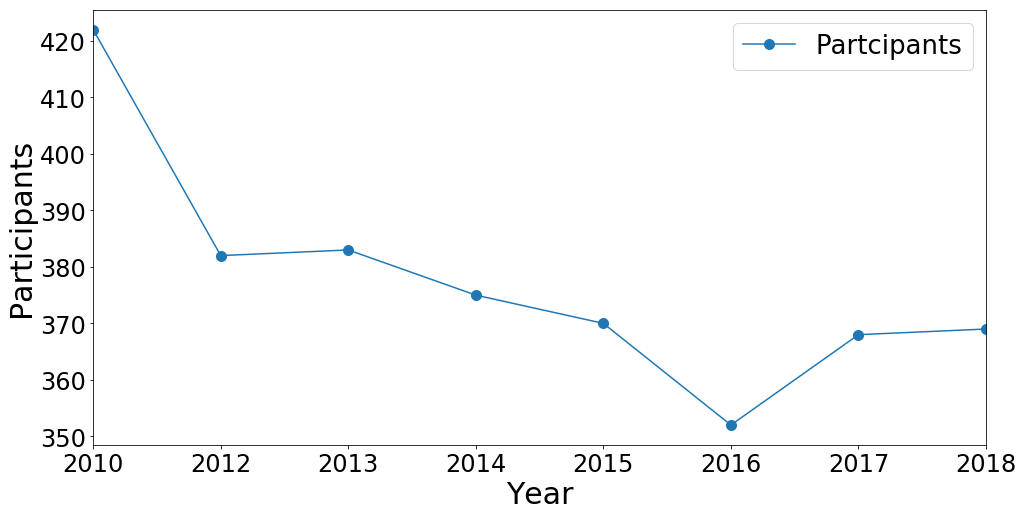

In [125]:
plt.figure()
ax = yearly.size().plot(kind='line', figsize=(16, 8), fontsize = 24, marker = 'o', ms=10)
ax.set_ylabel('Participants', fontsize = 30)

ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Partcipants'], frameon=True, ncol=2, loc='upper right', fontsize = 26)

Interestingly, there is a completely opposite trend for the Western States run. The participation
rate has been declining rapidly since 2010, with a low of just over 350 in 2016. The reason for this
is that there was a massive increase in the number of applicants in 2010, as the race was cancelled
in 2008 due to fires. Since then, there has been stricter qualifying standards enforced, which
means there are less applicants each year. This has caused the fall in participation rate. The
breakdown of these participation figures would be pivotal in us gaining more knowledge about the
type of people who participate in the UTMB. The different categories were the first section we
investigated, as this would tell us what age the majority of participants are.


###  Participation per Category

In [126]:
df.head()

,Year,bib,name_mask,gender,category,runner_age,rank,nationality,time,Start to Lyon Ridge,Start to Talbot Creek,Lyon Ridge to Red Star Ridge,Talbot Creek to Poppy Trailhead,Red Star Ridge to Duncan Canyon,Poppy Trailhead to Duncan Canyon,Duncan Canyon to Mosquito Ridge,Duncan Canyon to Robinson Flat,Mosquito Ridge to Millers Defeat,Robinson Flat to Millers Defeat,Millers Defeat to Dusty Corners,Dusty Corners to Last Chance,Last Chance to Devils Thumb,Devils Thumb to El Dorado Creek,El Dorado Creek to Michigan Bluff,Michigan Bluff to Foresthill,Foresthill to Dardanelles,Foresthill to Peachstone,Dardanelles to Peachstone,Peachstone to Fords Bar,Peachstone to Rucky Chucky,Rucky Chucky to Green Gate,Green Gate to Auburn Lake Trails,Auburn Lake Trails to Browns Bar,Auburn Lake Trails to Quarry Road,Browns Bar to Highway 49,Quarry Road to Pointed Rocks,Highway 49 to No Hands Bridge,Pointed Rocks to No Hands Bridge,No Hands Bridge to Robie Point,Robie Point to Finish
0,2018,20,7479fb90beffad048c5f772ba1915b4e,Male,Senior Men (23-39),28,1,USA,14:30:04,01:44:00,NaN,02:32:00,NaN,03:32:00,NaN,NaN,04:28:00,NaN,04:58:00,05:23:00,06:03:00,06:52:00,07:35:00,08:06:00-08:11:00,08:59:00-08:59:30,09:27:00,NaN,10:05:00,10:28:00,NaN,11:25:00,12:16:00,NaN,13:03:00,NaN,13:42:02,NaN,--:--,14:19:43,14:30:04
1,2018,13,343c649718c8ed904090cbcb05ca97b1,Male,Senior Men (23-39),32,2,FRA,15:54:53,01:43:00,NaN,02:35:00,NaN,03:41:00,NaN,NaN,04:39:00,NaN,05:10:00,05:37:00,06:17:00,07:07:00,07:47:00,08:25:00-08:30:00,09:27:00-09:27:30,10:02:00,NaN,10:46:00,11:10:00,NaN,12:17:00,13:12:00,NaN,14:04:00,NaN,14:50:00-14:52:00,NaN,--:--,15:40:27,15:54:53
2,2018,M3,275e1385c00219e79ea54c8d6381fc07,Male,Senior Men (23-39),33,3,USA,16:08:59,01:45:00,NaN,02:39:00,NaN,03:47:00,NaN,NaN,04:50:00,NaN,05:26:00,--:--,06:34:00,07:27:00,08:08:00,08:47:00-08:50:00,09:45:00-09:47:00,10:17:00,NaN,11:03:00,11:29:00,NaN,12:35:00,13:29:00,NaN,14:21:00,NaN,15:05:00-15:06:00,NaN,--:--,15:54:45,16:08:59
3,2018,M7,9a22e0603cd00f47e015963c32d6f964,Male,Senior Men (23-39),37,4,USA,16:23:32,01:46:00,NaN,02:41:00,NaN,03:49:00,NaN,NaN,04:53:00,NaN,05:26:00,--:--,06:34:00,07:29:00,08:11:00,08:52:00-08:56:00,09:56:00-09:57:50,10:28:00,NaN,11:14:00,11:40:00,NaN,12:49:00,13:44:00,NaN,14:38:00,NaN,15:23:00-15:24:00,NaN,--:--,16:10:17,16:23:32
5,2018,M10,0d274b89ac57a27941405195d37bf2c3,Male,Senior Men (23-39),31,6,USA,16:54:23,01:49:00,NaN,02:45:00,NaN,03:54:00,NaN,NaN,05:00:00,NaN,05:33:00,06:02:00,06:46:00,07:49:00,08:30:00,09:18:00-09:23:00,10:26:35,11:00:00,NaN,11:50:00,12:19:00,NaN,13:31:00,14:27:00,NaN,15:17:00,NaN,16:03:00-16:04:00,NaN,--:--,16:45:21,16:54:23


In [127]:
cat = df.groupby('category')['name_mask'].count()
cat.sort_values(ascending = False)

category
Masters Men 1 (40-49)      933
Senior Men (23-39)         885
Masters Men 2 (50-59)      445
Senior Women (23-39)       273
Masters Women 1 (40-49)    235
Masters Women 2 (50-59)    104
Masters Men 3 (60-69)      102
Youth Men (20-22)           15
Masters Men 4 (70-79)       15
Masters Women 3 (60-69)      8
Youth Women (20-22)          3
Masters Women 4 (70-79)      3
Name: name_mask, dtype: int64

Text(0.5,0,'Particpants')

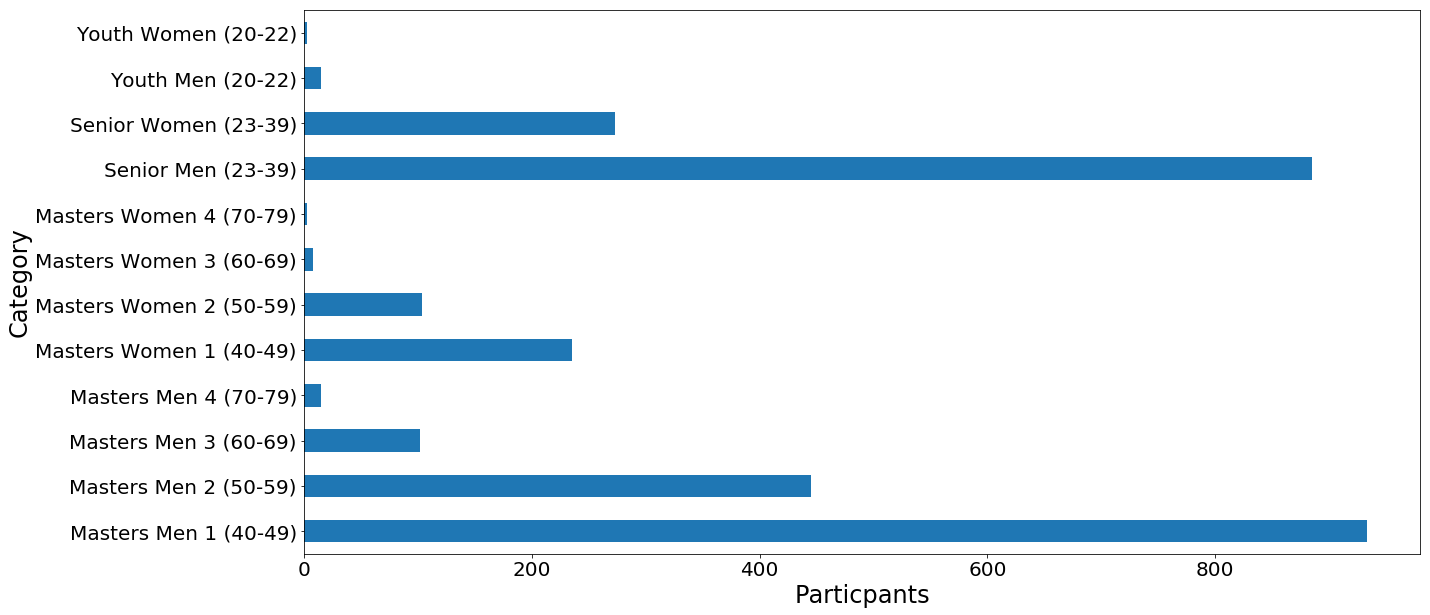

In [128]:
plt.figure()
ax = cat.plot.barh(figsize=(20, 10), fontsize = 20)
ax.set_ylabel('Category', fontsize = 24)

ax.set_xlabel('Particpants', fontsize = 24)

In [129]:
df.groupby(['category', 'Year'])['name_mask'].count().unstack()

Year,2010,2012,2013,2014,2015,2016,2017,2018
category,,,,,,,,
Masters Men 1 (40-49),124.0,114.0,113.0,123.0,120.0,107.0,125.0,107.0
Masters Men 2 (50-59),65.0,55.0,58.0,53.0,52.0,52.0,53.0,57.0
Masters Men 3 (60-69),20.0,16.0,12.0,15.0,11.0,13.0,5.0,10.0
Masters Men 4 (70-79),3.0,2.0,1.0,NaN,1.0,2.0,1.0,5.0
Masters Women 1 (40-49),38.0,24.0,23.0,29.0,35.0,31.0,27.0,28.0
Masters Women 2 (50-59),15.0,10.0,14.0,9.0,16.0,17.0,15.0,8.0
Masters Women 3 (60-69),NaN,1.0,3.0,NaN,1.0,NaN,1.0,2.0
Masters Women 4 (70-79),NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN
Senior Men (23-39),119.0,126.0,119.0,109.0,106.0,97.0,98.0,111.0


###  Participation per Gender

To look at the participation per gender we need to first create a 'Gender' column. This is done by combining the male categories and the female cateogories. 

In [130]:
yearly_gender = df.groupby(['Year', 'gender'])['name_mask'].count()
yearly_gender.unstack()

gender,Female,Male
Year,,
2010,86,336
2012,69,313
2013,77,306
2014,73,302
2015,79,291
2016,80,272
2017,85,283
2018,77,292


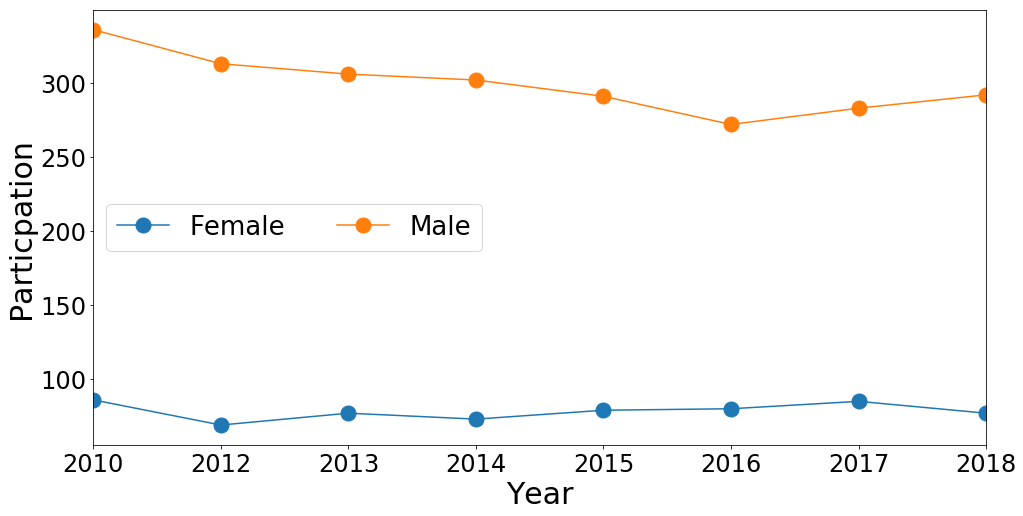

In [134]:
gen = df.groupby(['Year', 'gender'])['name_mask'].count().unstack()
ax = gen.plot(figsize=(16, 8), fontsize=24, marker='o', ms=15)
ax.set_ylabel('Particpation', fontsize = 30)
ax.set_xlabel('Year', fontsize = 30)
ax.legend(['Female', 'Male'], frameon=True, ncol=2, loc='center left', fontsize=26)

The ratio of females to males is far higher in the Western States. Just under 1 in 3 runners are
female, in comparison to almost 1 in 10 being female in the UTMB. Year on year, there is a slight
increase in female participation until 2018. Despite there being a slight increase in the number of
females participating for both races, the rises are not drastic. It would be interesting to investigate
how well women perform in the race, to try and find a reason why more women dont compete.


### Participation per nationality

Text(0.5,0,'Nationality')

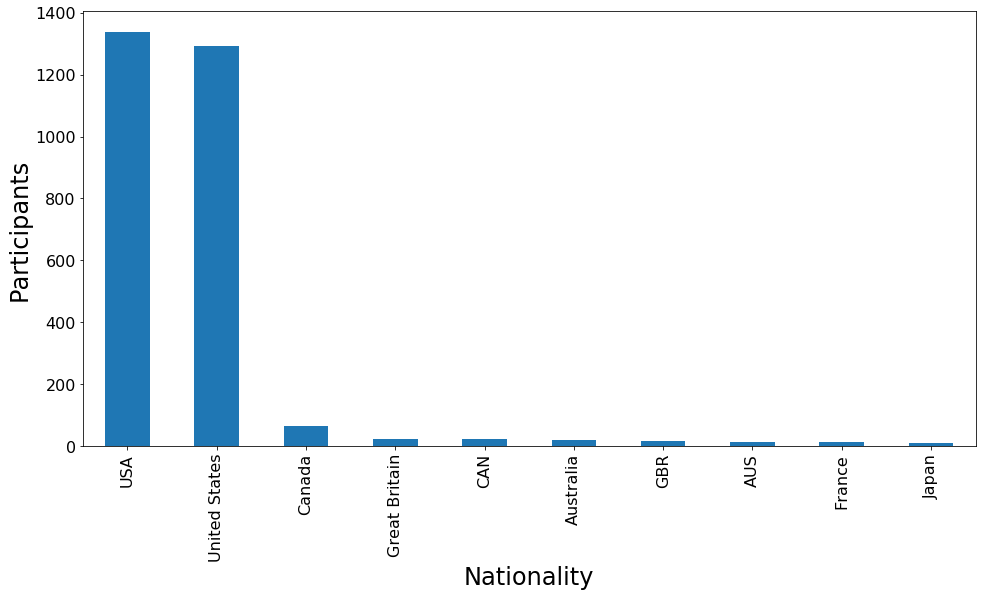

In [135]:
nat = df.groupby('nationality')['name_mask'].count()
natplot = nat.sort_values(ascending = False).head(10)


ax = natplot.plot.bar(x='nationality', figsize=(16, 8), fontsize=16)

ax.set_ylabel('Participants', fontsize = 24)
ax.set_xlabel('Nationality', fontsize = 24)

Unsurprisingly, the US dominates participation. 

In [136]:
df.to_csv('../../data/WS_df_full_10_18.csv')